<a href="https://colab.research.google.com/github/svnflxvver/TUBESTATISTIKA/blob/main/MozaSajidahPutriAlMuzaffar_IF_44_01_1_PJJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tugas Besar Statistika**
####Dikerjakan oleh Moza Sajidah Putri Al Muzaffar
####Kelas : IF-44-01.1 PJJ, NIM : 1304201009

Tugas ini dilakukan dengan tujuan untuk mendapatkan informasi tentang karakteristik pemegang kartu kredit suatu bank yang akan disajikan kepada manager bank tersebut. Hal ini dilakukan melalui eksplorasi terhadap data yang berhubungan dengan data dari bank tersebut.
###### Sumber data : [Credit Card customers Predict Churning customers](https://www.kaggle.com/sakshigoyal7/credit-card-customers)

#**Collect and Organize Data**

Pada tahap ini dilakukan penginstalan library package R dan sumber data yang diperlukan untuk mengeksplorasi data.

In [ ]:
#Menginstall library package yang diperlukan.
install.packages("GGally")
install.packages("ggplot2")
install.packages("gridExtra")
install.packages("dplyr")
install.packages("treemap")
install.packages("tidyverse")
install.packages("corrplot")

library(GGally)
library(ggplot2)
library(gridExtra)
library(dplyr)
library(treemap)
library(tidyverse)
library(corrplot)

In [ ]:
#Mengimport dataset.
url = "https://raw.githubusercontent.com/svnflxvver/TUBESTATISTIKA/main/BankChurners.csv"
x <- read.csv(url)

#Menampilkan 5 baris awal dataset x.
head(x, 5)

#Menampilkan 5 baris akhir dataset x.
tail(x, 5)

In [ ]:
#Mengetahui dimensi data.
dim(x)

Terdapat 10127 Observations, atau yang dapat juga disebut dengan jumlah baris data, dan 23 variables, atau yang dapat juga disebut dengan banyaknya kolom pada data.

In [ ]:
#Menampilkan rangkuman dari dataset x.
summary(x)

In [ ]:
#Mengetahui jumlah missing value dari dataset x.
sum(is.na(x))

Kesimpulan:

tidak terdapat missing value terhadap dataset x. 

#**Wrangle Data**

##### Pada tahap ini dilakukan pembersihan pada data.

In [7]:
#Kolom ke-22 dan ke-23 dihapus berdasarkan saran yang tercantum pada deskripsi sumber data di web.
cld_x <- x[1:21]

cld merupakan singkatan dari kata "cleaned".

In [ ]:
#Mengetahui jumlah observasi, variabel, dan tipe-tipe data yang terdapat pada dataset yang sudah dibersihkan.
str(cld_x)

Terdapat 10127 Observations, atau yang dapat juga disebut dengan jumlah baris data, dan 21 variables, atau yang dapat juga disebut dengan banyaknya kolom pada data. Selain itu, terdapat 6 variabel yang bertipe data chr (character) atau strings, dan 15 variabel yang terdiri dari 5 variabel bertipe data num (numeric - real/decimal) dan 10 variable bertipe data int (integer). 

In [ ]:
#Mengetahui jumlah missing value pada dataset x yang sudah dibersihkan.
sum(is.na(cld_x))

Dapat disimpulkan bahwa tidak terdapat data yang kosong.

In [ ]:
#Menampilkan rangkuman dari dataset.
summary(cld_x)

Demi memberikan urutan terhadap variabel tertentu, dilakukan pengurutan pada struktur data agar data terlihat lebih terstruktur. 

In [ ]:
#Memberikan levels urutan terhadap Card Category. 
cld_x$Card_Category <- factor(cld_x$Card_Category, levels = c("Blue", "Silver", "Gold", "Platinum"))
cld_x$Card_Category

#Memberikan levels urutan terhadap Income Category. 
cld_x$Income_Category <- factor(cld_x$Income_Category, levels = c("Unknown", "Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"))
cld_x$Income_Category

#Memberikan levels urutan terhadap Marital Status. 
cld_x$Marital_Status <- factor(cld_x$Marital_Status, levels = c("Unknown", "Single", "Married", "Divorced"))
cld_x$Marital_Status

#Memberikan levels urutan terhadap Education Level. 
cld_x$Education_Level <- factor(cld_x$Education_Level, levels = c("Uneducated", "High School", "College", "Graduate", "Post-Graduate", "Doctorate", "Unknown"))
cld_x$Education_Level

In [ ]:
#Mengetahui jumlah observasi, variabel, dan tipe-tipe data yang terdapat pada dataset 
#setelah dilakukan perubahan dengan penambahan urutan levels pada variabel tertentu.
str(cld_x)

#**Explore, Visualize and Analyze Data**

Pada tahap ini akan dilakukan eksplorasi, visualisasi dan analisa pada data.

#**Attrition Flag**

##### Akan dilakukan visualisasi data berdasarkan atribut Attrition Flag terhadap atribut yang lainnya dengan berbagai macam tipe plot yang ada.

##**A. Barplot**

###**A.1. Barplot distribusi frekuensi Attrition Flag**
##### Visualisasi data dilakukan untuk mengetahui banyaknya customer yang masih menggunakan layanan kartu kredit pada bank tersebut. 

In [ ]:
#Membuat sebuah data frame yang berisikan data Attrition Flag dari dataset cld_x.
attr <- as.data.frame(table(cld_x$Attrition_Flag))

#Merubah nama variabel Var1 menjadi Attrition_flag.
attr = attr %>%
rename(Attrition_flag = Var1)

#Memanggil data frame untuk attrition flag.
attr

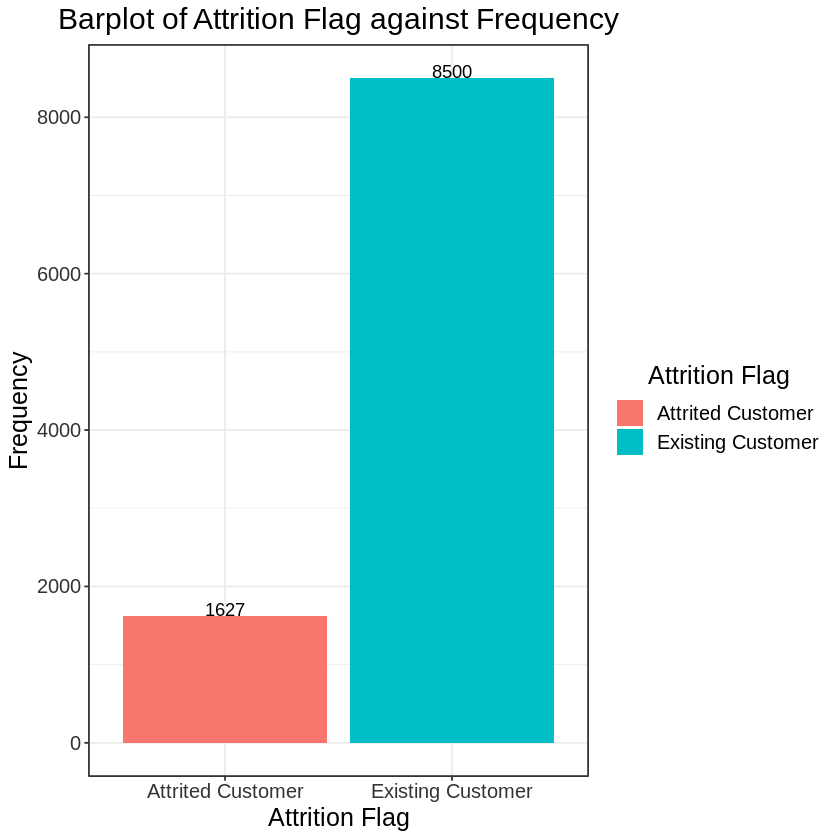

In [134]:
#Menampilkan distribusi frekuensi pengguna kartu kredit berdasarkan attrition flag.
ggplot(data = attr, aes(x = Attrition_flag ,  y = Freq, fill = Attrition_flag)) +
  geom_bar(stat = "identity") +
  labs(x = "Attrition Flag",
       y = "Frequency",
       title = "Barplot of Attrition Flag against Frequency") +
  scale_fill_discrete(name = "Attrition Flag") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 15)) +
  geom_text(aes(label = Freq, vjust = 0))

Berdasarkan barplot di atas, dapat disimpulkan bahwa terdapat :

*   1627 customer yang telah berhenti menggunakan layanan kartu kredit dari bank tersebut. 
*   8500 customer yang masih menggunakan layanan kartu kredit dari bank tersebut. 

###**A.2. Barplot Customer Gender dengan jumlah customer**
##### Visualisasi data dilakukan untuk mengetahui banyaknya customer yang masih menggunakan layanan kartu kredit pada bank tersebut berdasarkan jenis kelamin customer. 

In [ ]:
ggplot(data = cld_x, aes(x = Gender, fill = Attrition_Flag)) +
  geom_bar(position = "dodge") +
  labs(y = "Number of Customer",
       x = "Customer Gender", 
       title = "Barplot of Customer Gender against Number of Customer") +
  scale_fill_discrete(name = "Attrition Flag") +
  coord_cartesian(ylim=c(0, 5000)) + 
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 10)) 

Berdasarkan barplot di atas, dapat disimpulkan bahwa di antara customer yang masih menggunakan layanan kartu kredit dengan yang tidak:
1.   perbedaan yang terlihat : 

>>
*   jumlah pengguna kartu kredit yang signifikan.

2.   persamaan yang terlihat  :

>>
*   berdasarkan jenis kelamin, pengguna kartu kredit berjenis kelamin perempuan lebih banyak dibandingkan dengan pengguna kartu kredit berjenis kelamin laki-laki. 
*   perbedaan jumlah pengguna yang tidak terlalu jauh antara pengguna kartu kredit dengan jenis kelamin perempuan dan laki-laki. 
*   pengguna kartu kredit berjenis kelamin perempuan memiliki jumlah pengguna yang lebih tinggi dibandingkan dengan laki-laki. 

###**A.3. Barplot Marital Status dengan jumlah customer**
##### Visualisasi data dilakukan untuk mengetahui banyaknya customer yang masih menggunakan layanan kartu kredit pada bank tersebut berdasarkan status pernikahan/hubungan customer. 

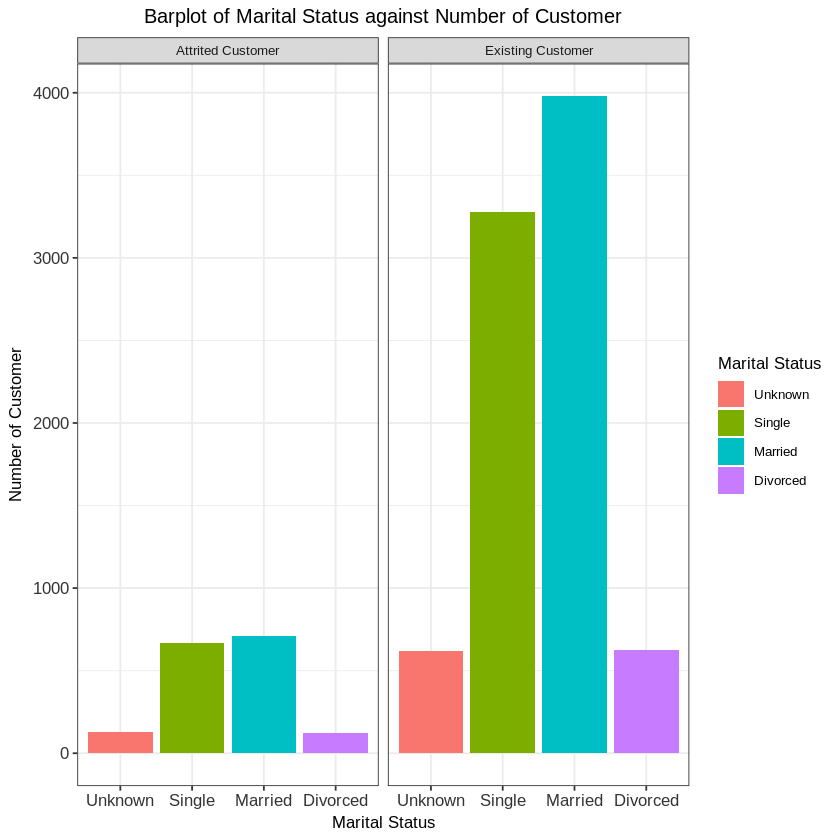

In [136]:
ggplot(data = cld_x, aes(x = Marital_Status, fill = Marital_Status)) +
  geom_bar(position = "dodge") +
  labs(y = "Number of Customer",
       x = "Marital Status", 
       title = "Barplot of Marital Status against Number of Customer") +
  scale_fill_discrete(name = "Marital Status") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 10),
        axis.text.y = element_text(colour = "grey20", size = 10),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 10)) +
  facet_wrap(~Attrition_Flag)


Berdasarkan barplot di atas, dapat disimpulkan bahwa di antara customer yang masih menggunakan layanan kartu kredit dengan yang tidak:
1.   **perbedaan yang terlihat** : 

>>
*   jumlah pengguna kartu kredit yang signifikan.
*   berdasarkan status hubungan customer, pengguna kartu kredit yang sudah menikah dan *single* diketahui memiliki jumlah pengguna yang sama-sama tinggi,  tetapi memiliki sedikit perbedaan pada customer yang sudah berhenti berlangganan dan perbedaan yang cukup terlihat pada customer yang masih berlangganan. 

2.   **persamaan yang terlihat**  :

>>
*   berdasarkan status hubungan customer, pengguna kartu kredit yang cerai dan statusnya tidak diketahui memiliki jumlah pengguna yang hampir sama.
*   berdasarkan status hubungan customer, pengguna kartu kredit yang sudah menikah sama-sama memiliki jumlah pengguna yang lebih banyak dibandingkan dengan pengguna dengan status hubungan lainnya. 

##**B. Boxplot**

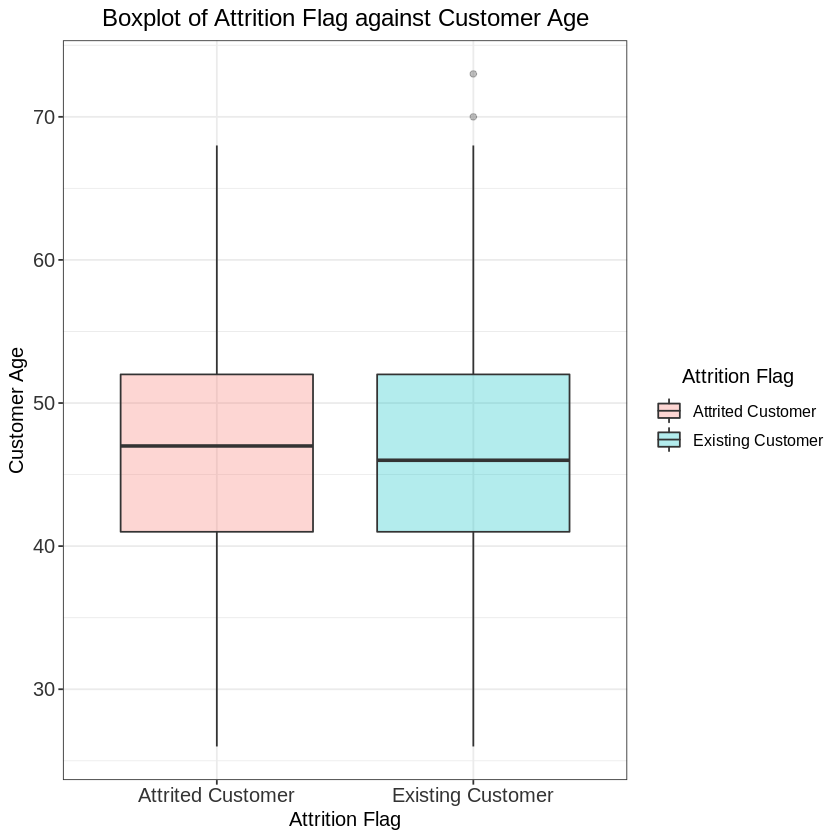

In [144]:
#Menampilkan boxplot relasi antara Attrition flag  dengan Customer Age.
ggplot(data = cld_x, aes(x = factor(Attrition_Flag), y = Customer_Age, fill = Attrition_Flag)) +
  geom_boxplot(alpha = .3) +
  labs(x = "Attrition Flag", 
       y = "Customer Age",
       title = "Boxplot of Attrition Flag against Customer Age") +
  scale_fill_discrete(name = "Attrition Flag") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 12))

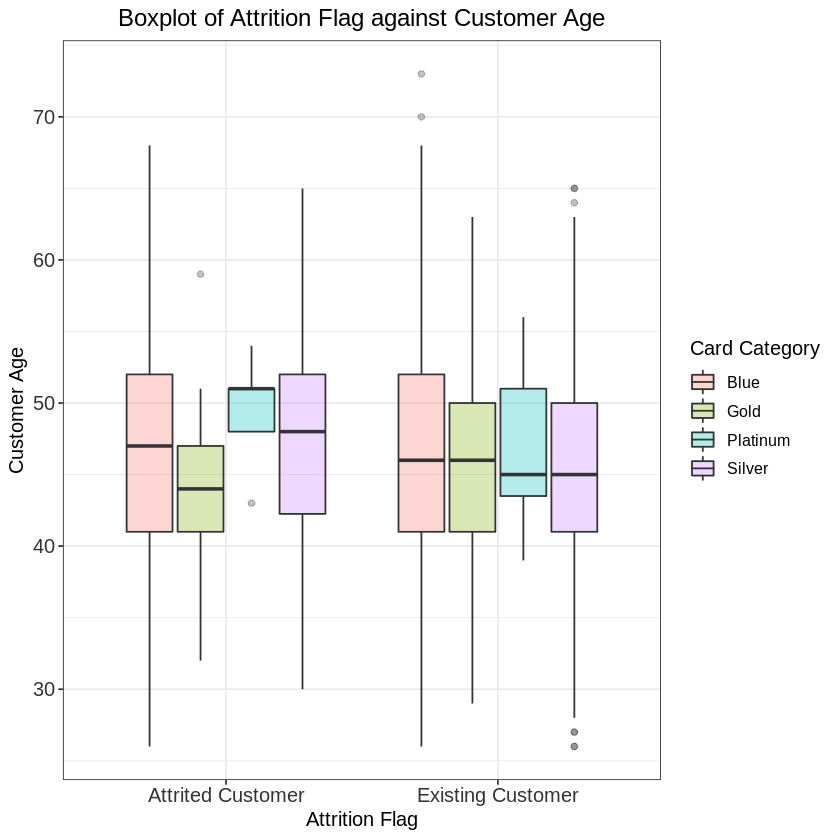

In [9]:
#Menampilkan boxplot relasi antara attrition flag dengan customer age berdasarkan Card category.
ggplot(data = cld_x ,aes(x = factor(Attrition_Flag), y = Customer_Age, fill = Card_Category)) +
  geom_boxplot(alpha = .3) +
  labs(x = "Attrition Flag", 
       y = "Customer Age",
       title = "Boxplot of Attrition Flag against Customer Age") +
  scale_fill_discrete(name = "Card Category") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 12))

#**Customer Age**

##### Akan dilakukan visualisasi data berdasarkan atribut Customer Age terhadap atribut yang lainnya dengan berbagai macam tipe plot yang ada.

##**A. Histogram Customer Age**

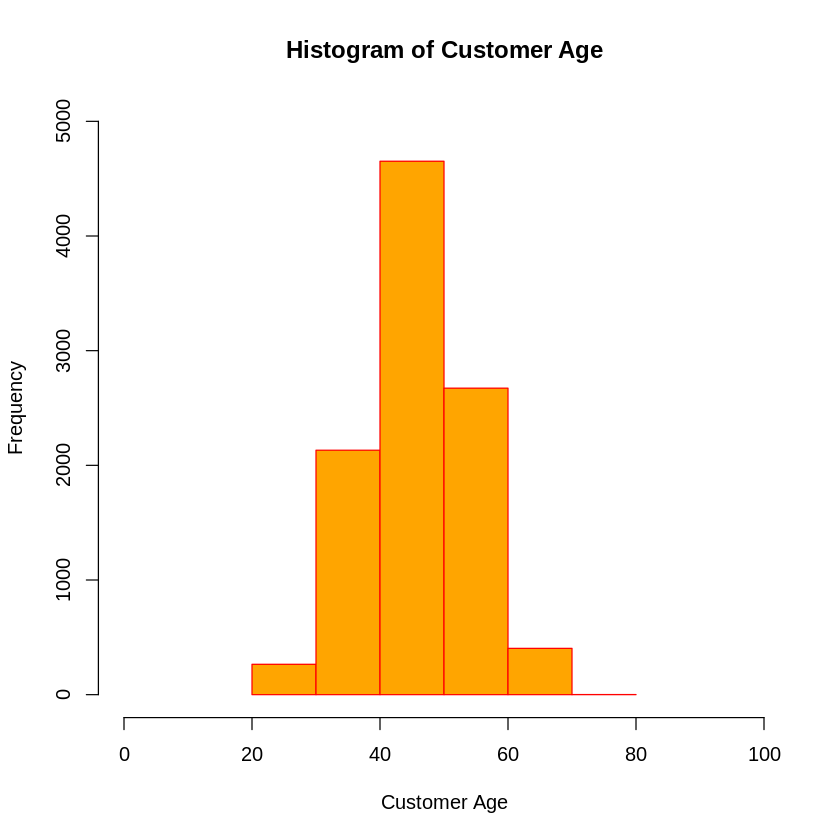

In [140]:
#Menampilkan distribusi frekuensi pengguna kartu kredit berdasarkan umur customer.
hist(cld_x$Customer_Age,
     xlab = "Customer Age",
     main = "Histogram of Customer Age",
     col = "orange",
     border = "red", 
     ylim = c(0,5000),
     xlim = c(0, 100),
     breaks = 5
     )

Berdasarkan histogram di atas, dapat disimpulkan bahwa:

* jumlah customer yang paling banyak berada di kisaran umur 40-50 tahun, dengan frekuensi melebihi 4000 customer.
* jumlah customer yang paling banyak di posisi kedua berada di kisaran umur 50-60 tahun, dengan frekuensi melebihi 2000 customer.
* jumlah customer yang paling banyak di posisi ketiga berada di kisaran umur 30-40 tahun, dengan frekuensi sekitar 2000 customer.



- jumlah customer yang paling sedikit berada di kisaran umur 70-80 tahun, dengan frekuensi yang hampir menyentuh angka nol (0).
- jumlah customer yang paling sedikit di posisi kedua berada di kisaran umur 20-30 tahun, dengan frekuensi jauh di bawah 1000 customer.
- jumlah customer yang paling sedikit di posisi ketiga berada di kisaran umur 60-70 tahun, dengan frekuensi melebih sedikit dari frekuensi customer di kisaran umur 20-30.

In [ ]:
#Membuat sebuah data frame yang berisikan data Customer Age dari dataset cld_x.
age <- as.data.frame(table(cld_x$Customer_Age))

#Merubah nama variabel Var1 menjadi age.
age <- age %>% 
  rename(
    Age = Var1
  )

#Memanggil data frame age.
age

Dataframe ini dibuat untuk memvisualisasikan data mengenai umur customer bank secara lebih detail. 

In [ ]:
#Menunjukkan dimensi dari data frame.
dim(age)

Terdapat 45 Observations dan 2 Variables, dimana masing-masing dari observations tersebut merupakan umur customer dan variables terdiri dari Age dan Freq. 

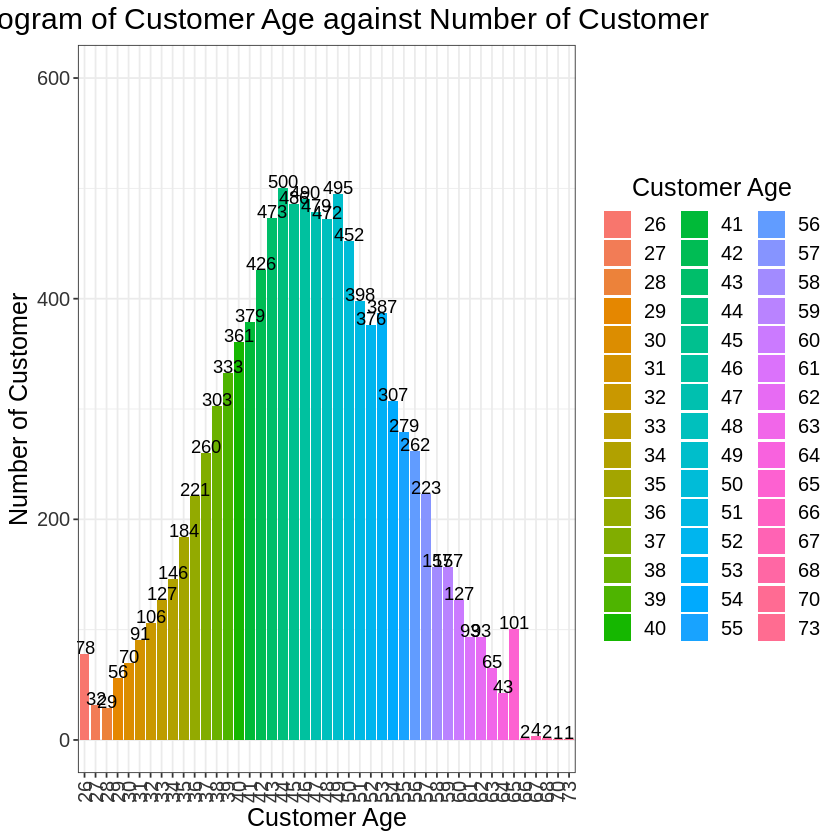

In [143]:
#Menampilkan distribusi frekuensi pengguna kartu kredit berdasarkan umur customer secara lebih detail.
ggplot(data = age, aes(x = Age,  y = Freq, fill = Age)) +
  geom_bar(stat = "identity") +
  labs(y = "Number of Customer",
       x = "Customer Age", 
       title = "Histogram of Customer Age against Number of Customer") +
  scale_fill_discrete(name = "Customer Age") +
  coord_cartesian(ylim=c(0, 600)) + 
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12, angle = 90,
                                   hjust = 0.5, vjust = 0.5),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 15)) +
  geom_text(aes(label = Freq, vjust = 0))

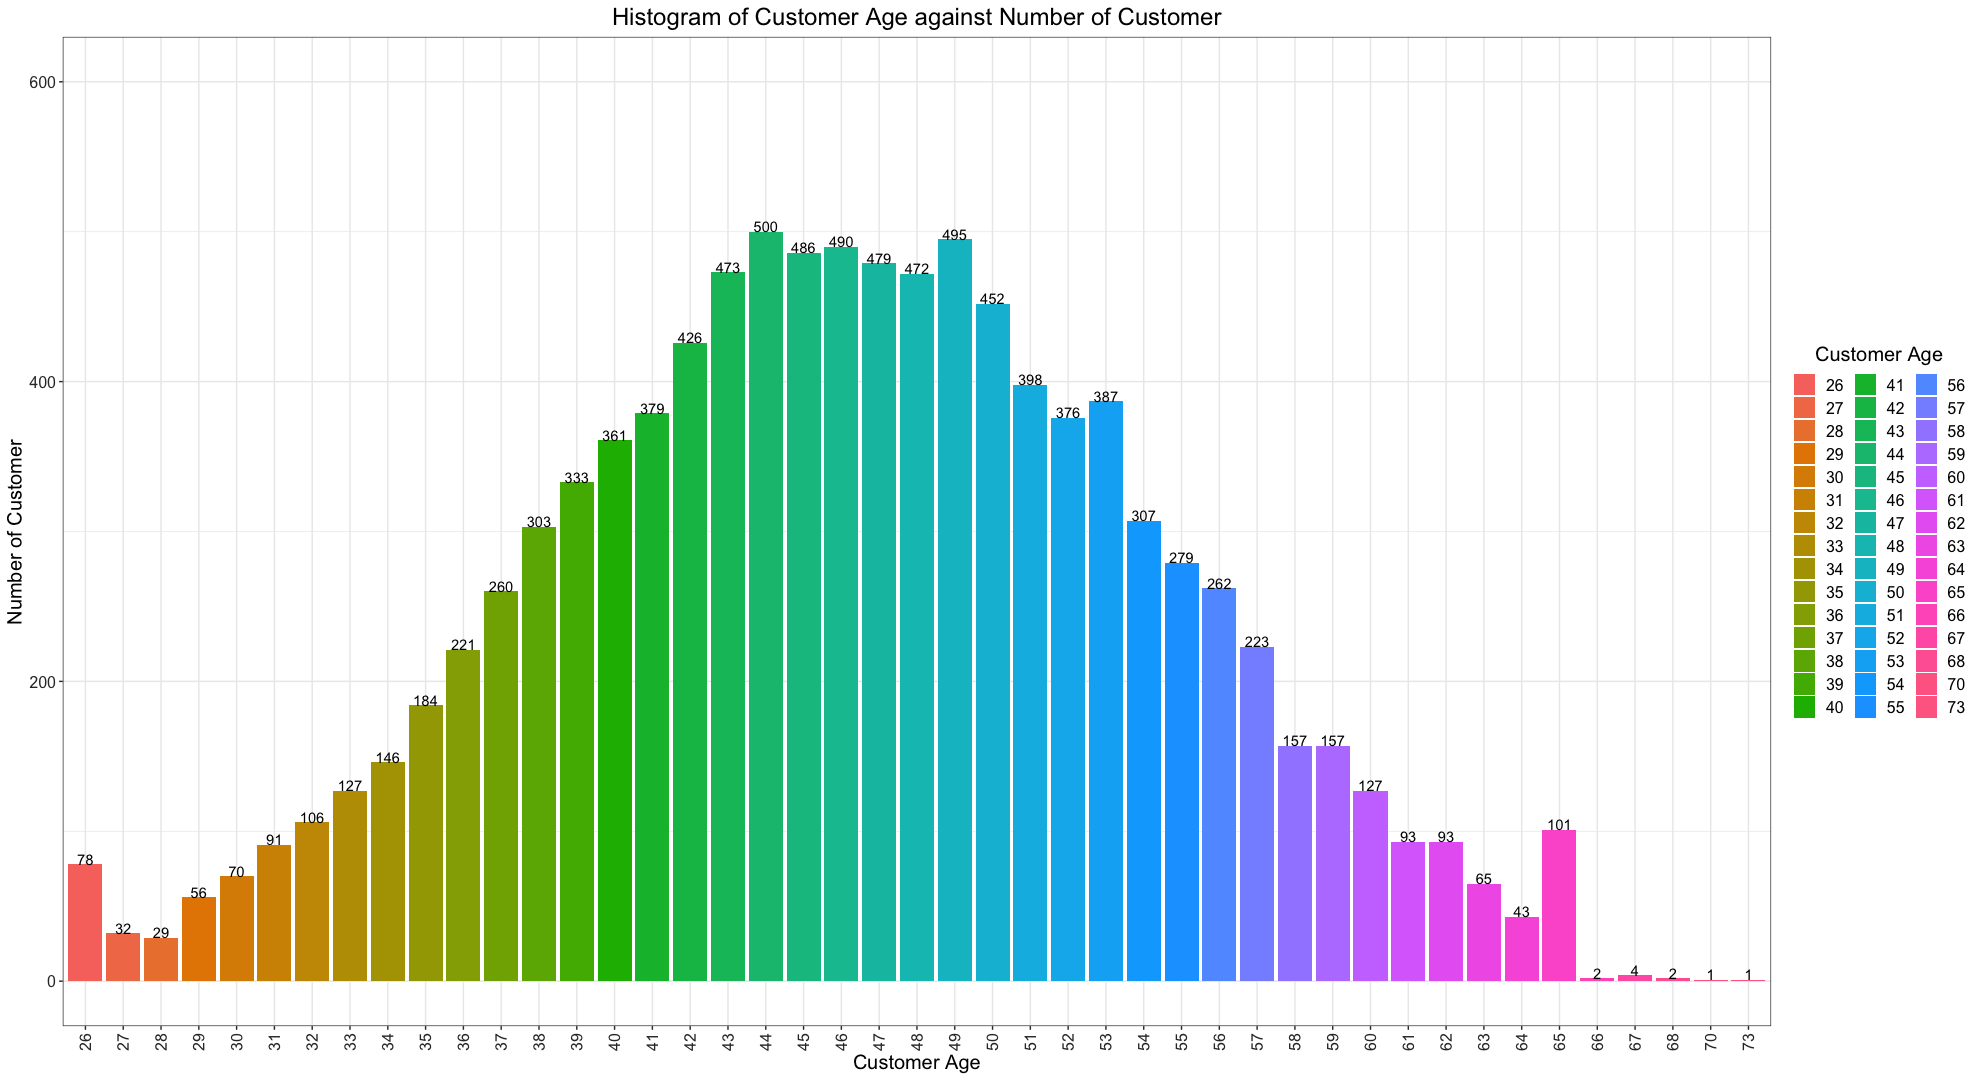

Berdasarkan histogram di atas, dapat disimpulkan bahwa:


*   Customer terbanyak rata-rata berumur 42-50, yang jumlahnya berkisar 400-500 orang.
> Customer yang berumur 44 memiliki frekuensi terbanyak dengan jumlah 500 orang. 
*   Customer terbanyak kedua rata-rata berumur 38-41 & 51-55, yang masing-masing umurnya berjumlah sekitar 300 orang.
*   Customer terbanyak ketiga rata-rata berumur 36-37 & 55-57, yang masing-masing umurnya berjumlah sekitar 200 orang.
*   Customer terbanyak keempat rata-rata berumur 32-35, 58-60 & 65, yang masing-masing umurnya berjumlah sekitar 100 orang.
> Customer yang berumur 58 dan 59 memiliki jumlah yang sama, yaitu 157 orang. 
*   Customer terbanyak kelima rata-rata berumur 26-31, 61-64, yang masing-masing umurnya berjumlah dibawah 100 orang.
> Customer yang berumur 60 dan 61 memiliki jumlah yang sama, yaitu 93 orang. 
*   Customer paling sedikit rata-rata berumur 66-68, 70 & 73 yang masing-masing umurnya berjumlah di antara 4 sampai 1 orang saja. 

 Customer yang berumur 66 dan 68 memiliki jumlah yang sama, yaitu 2 orang.

 Customer yang berumur 70 dan 73 memiliki jumlah yang sama, yaitu 1 orang.

 Customer yang berumur 70 dan 73 memiliki frekuensi yang paling sedikit dengan jumlah hanya 1 orang.   

##**B. Boxplot Customer Age**

In [26]:
#Menampilkan rangkuman lima nilai.
summary(cld_x$Customer_Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  26.00   41.00   46.00   46.33   52.00   73.00 

Kesimpulan yang didapat dari keseluruhan data umur pengguna, yaitu:

* Umur pengguna yang paling rendah adalah umur 26 tahun.
* 25% pengguna berumur 41 tahun ke bawah. 
* Umur pengguna yang paling tinggi adalah umur 73 tahun.
* 25% pengguna berumur 52 tahun ke atas. 
* Umur rata-rata pengguna adalah sekitar 46 tahun.

karena hasil *Mean* lebih besar daripada hasil *Median* dapat diketahui bahwa distribusi data lebih condong ke arah yang positif. 

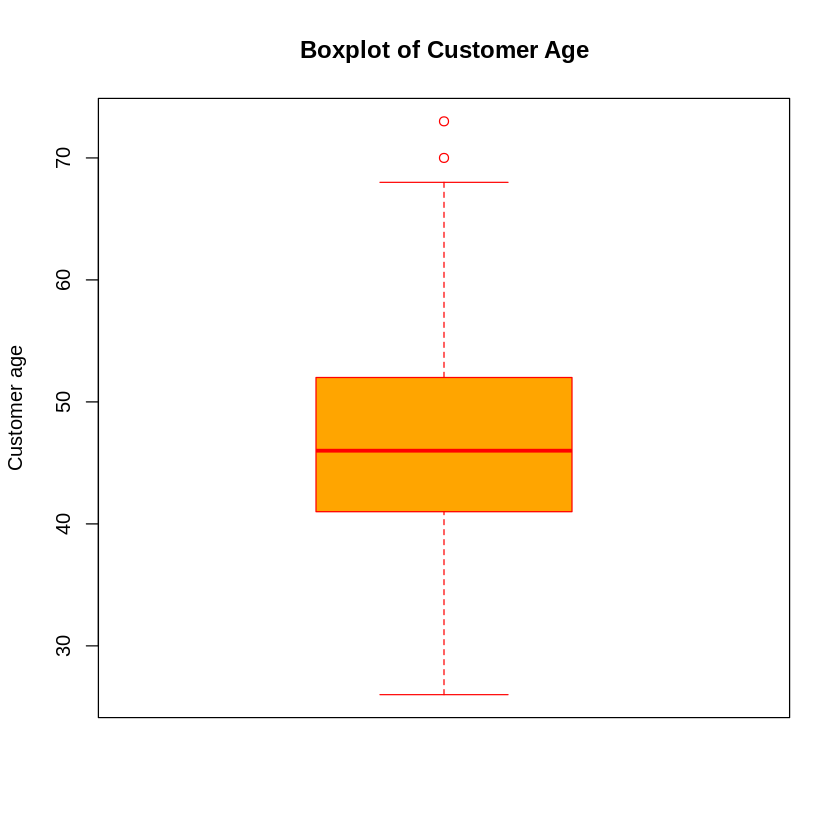

In [27]:
#Menampilkan boxplot dari umur pengguna.
boxplot(cld_x$Customer_Age, 
        ylab = "Customer age",
        main = "Boxplot of Customer Age",
        col = "orange",
        border = "red"
        )

Berdasarkan boxplot di atas, dapat disimpulkan bahwa :
* pengguna kebanyakan berumur sekitar 40-50 tahun.
* pengguna rata-rata berumur sekitar 45 tahun.
* terdapat pencilan di sekitar umur 70 tahun ke atas. 
* data umur pengguna memiliki distribusi yang cenderung simetrik dilihat berdasarkan gambar visualisasi dan data pendukung antara *mean* dan *median* di atas.


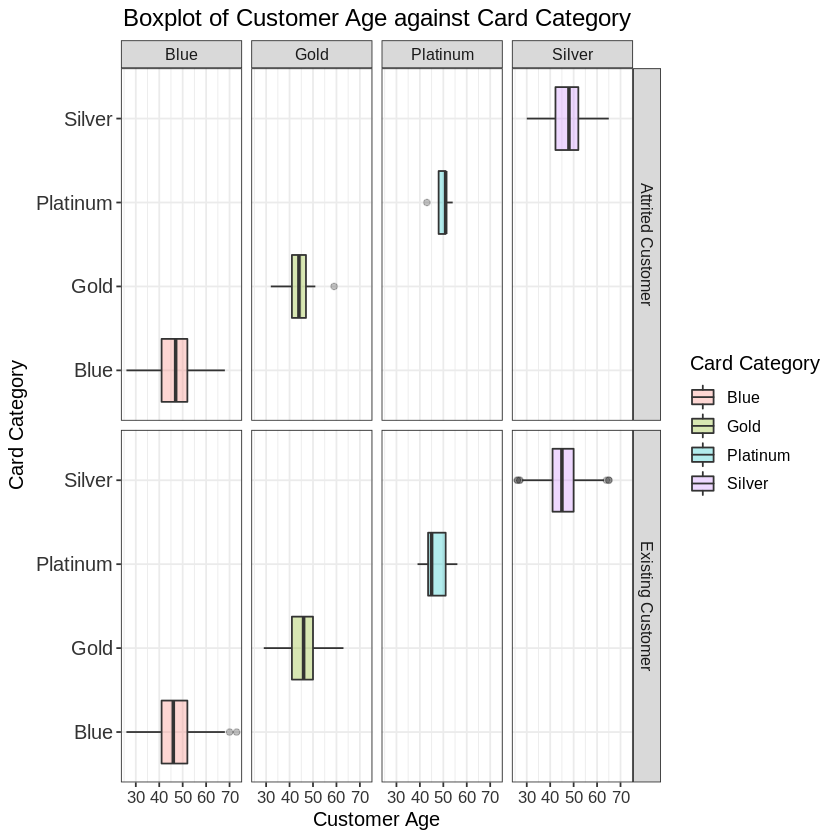

In [102]:
#Menampilkan boxplot relasi antara Customer Age dengan Card Category berdasarkan Card category.
ggplot(data = cld_x, aes(x = Customer_Age, y = Card_Category, fill = Card_Category)) +
  geom_boxplot(alpha = .3) +
  labs(x = "Customer Age", 
       y = "Card Category",
       title = "Boxplot of Customer Age against Card Category") +
  scale_fill_discrete(name = "Card Category") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 10),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 12)) +
  facet_grid(cols = vars(Card_Category), rows = vars(Attrition_Flag)) 

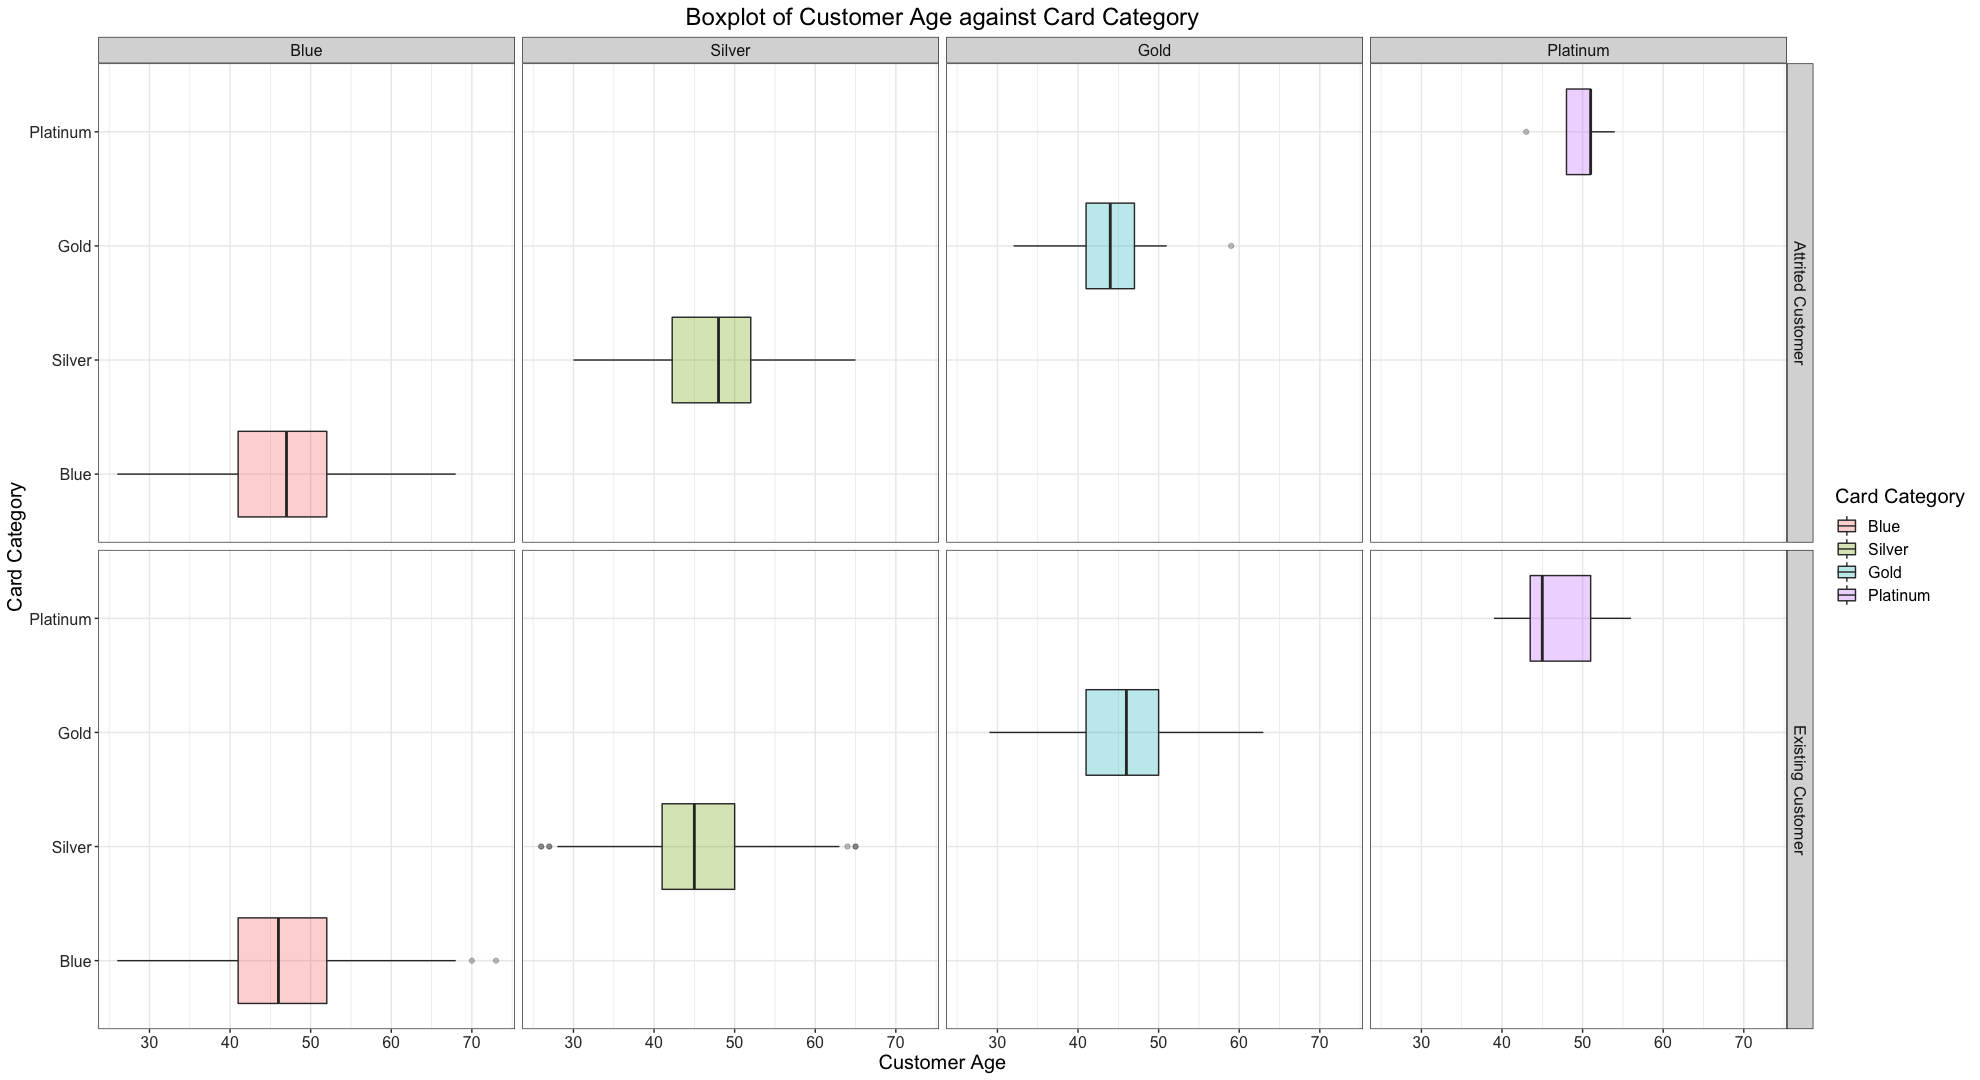

#**Education Level**

##### Akan dilakukan visualisasi data berdasarkan atribut Education Level terhadap atribut yang lainnya dengan berbagai macam tipe plot yang ada.

##**A. Barplot Education Level**
Visualisasi data dilakukan terhadap atribut level edukasi seseorang (Education Level) untuk mencari tahu distribusi penyebaran pengguna kartu kredit. 

In [ ]:
ggplot(data = cld_x, aes(x = Education_Level, fill = Attrition_Flag)) +
  geom_bar(position = "dodge") +
  labs(y = "Number of Customer",
       x = "Education Level", 
       title = "Barplot of Customer Education Level against Number of Customer") +
  scale_fill_discrete(name = "Attrition Flag") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 7),
        axis.text.y = element_text(colour = "grey20", size = 10),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 10)) +
  coord_cartesian(ylim=c(0, 3000)) 

Berdasarkan barplot di atas, dapat disimpulkan bahwa:


*  Pengguna kartu kredit paling banyak, baik itu dari yang masih dan sudah berhenti berlangganan, diperoleh oleh pengguna kartu kredit yang telah mengenyam pendidikan S-2 (Graduate). 

*  Pengguna kartu kredit paling banyak kedua, baik itu dari yang masih dan sudah berhenti berlangganan, diperoleh oleh pengguna kartu kredit yang telah mengenyam pendidikan SMA (High School). 

*  Pengguna kartu kredit paling banyak ketiga, baik itu dari yang masih dan sudah berhenti berlangganan, diperoleh oleh pengguna kartu kredit yang berada di kategori Unknown dan Uneducated. 

*  Pengguna kartu kredit paling sedikit, untuk yang masih berlangganan, diperoleh oleh pengguna kartu kredit yang berada di kategori Doctorate.

*  Pengguna kartu kredit paling sedikit, untuk yang telah berhenti berlangganan, diperoleh oleh pengguna kartu kredit yang berada di kategori Post-Graduate & Doctorate.

##**B. Boxplot Education Level**

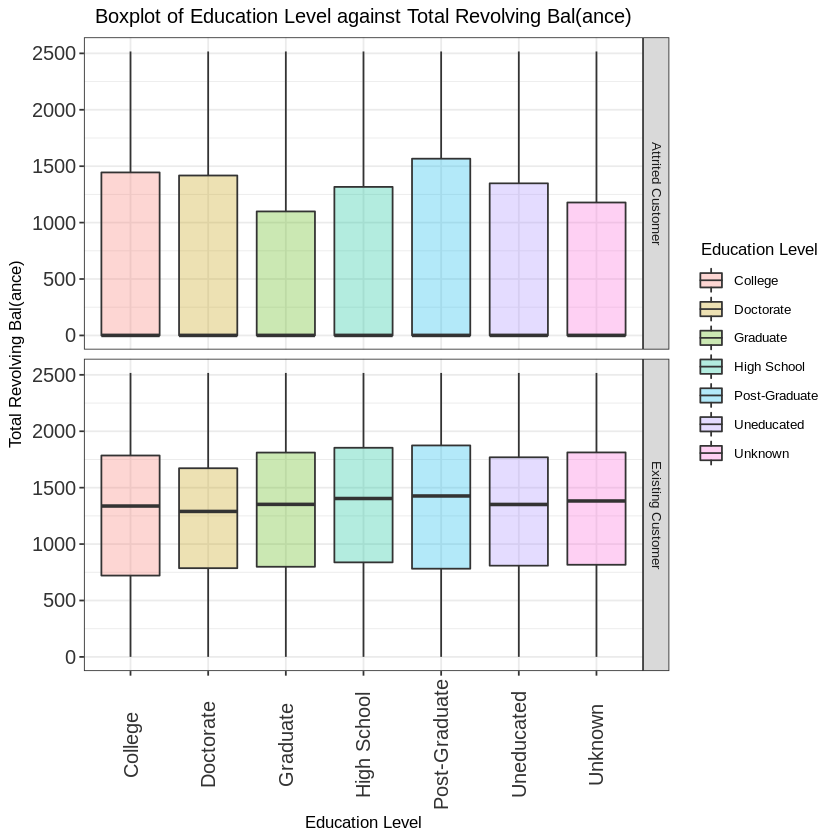

In [91]:
#Menampilkan boxplot relasi antara Education Level dengan Total Revolving Balance berdasarkan Education Level.
ggplot(data = cld_x, aes(x = Education_Level, y = Total_Revolving_Bal, fill = Education_Level)) +
  geom_boxplot(alpha = .3) +
  labs(x = "Education Level", 
       y = "Total Revolving Bal(ance)",
       title = "Boxplot of Education Level against Total Revolving Bal(ance)") +
  scale_fill_discrete(name = "Education Level") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12, angle = 90,
                                   hjust = 0.5, vjust = 0.5),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 10)) +
  facet_grid(rows = vars(Attrition_Flag))

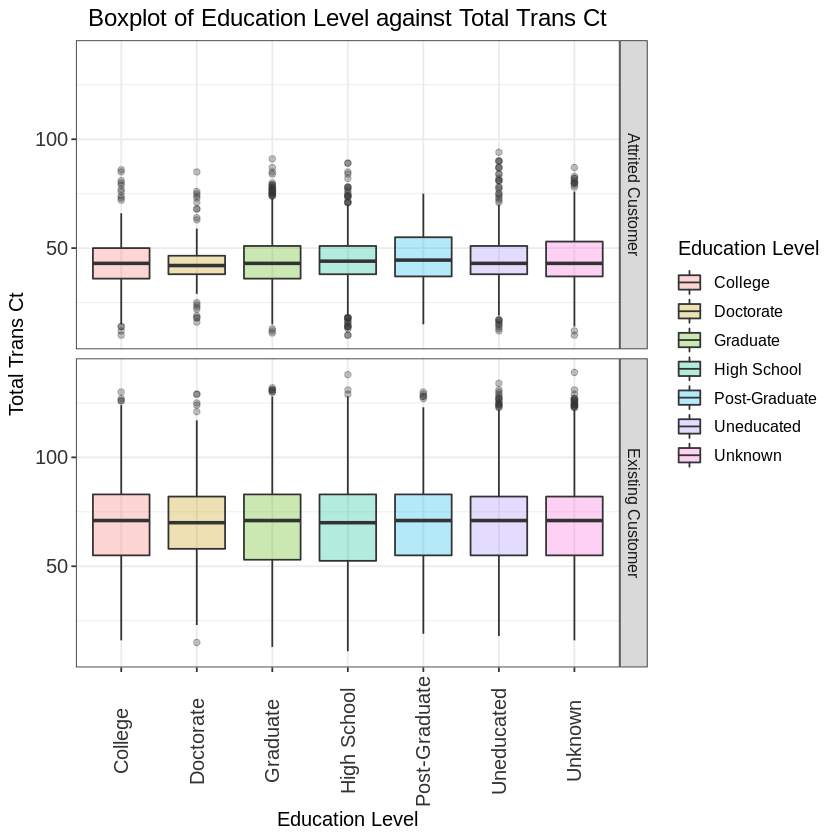

In [93]:
#Menampilkan boxplot relasi antara Education Level dengan Total Trans Ct berdasarkan Education Level.
ggplot(data = cld_x, aes(x = Education_Level, y = Total_Trans_Ct, fill = Education_Level)) +
  geom_boxplot(alpha = .3) +
  labs(x = "Education Level", 
       y = "Total Trans Ct",
       title = "Boxplot of Education Level against Total Trans Ct") +
  scale_fill_discrete(name = "Education Level") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12, angle = 90,
                                   hjust = 0.5, vjust = 0.5),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 12)) +
  facet_grid(rows = vars(Attrition_Flag))

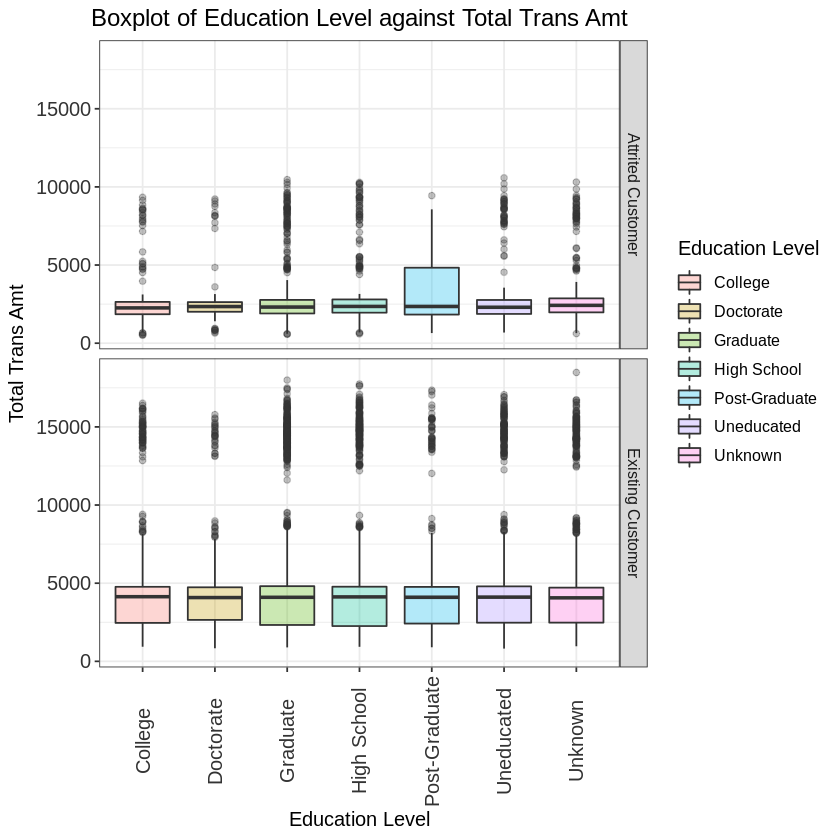

In [95]:
#Menampilkan boxplot relasi antara Education Level dengan Total Trans Amt berdasarkan Education Level.
ggplot(data = cld_x, aes(x = Education_Level, y = Total_Trans_Amt, fill = Education_Level)) +
  geom_boxplot(alpha = .3) +
  labs(x = "Education Level", 
       y = "Total Trans Amt",
       title = "Boxplot of Education Level against Total Trans Amt") +
  scale_fill_discrete(name = "Education Level") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12, angle = 90,
                                   hjust = 0.5, vjust = 0.5),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 12)) +
  facet_grid(rows =  vars(Attrition_Flag))

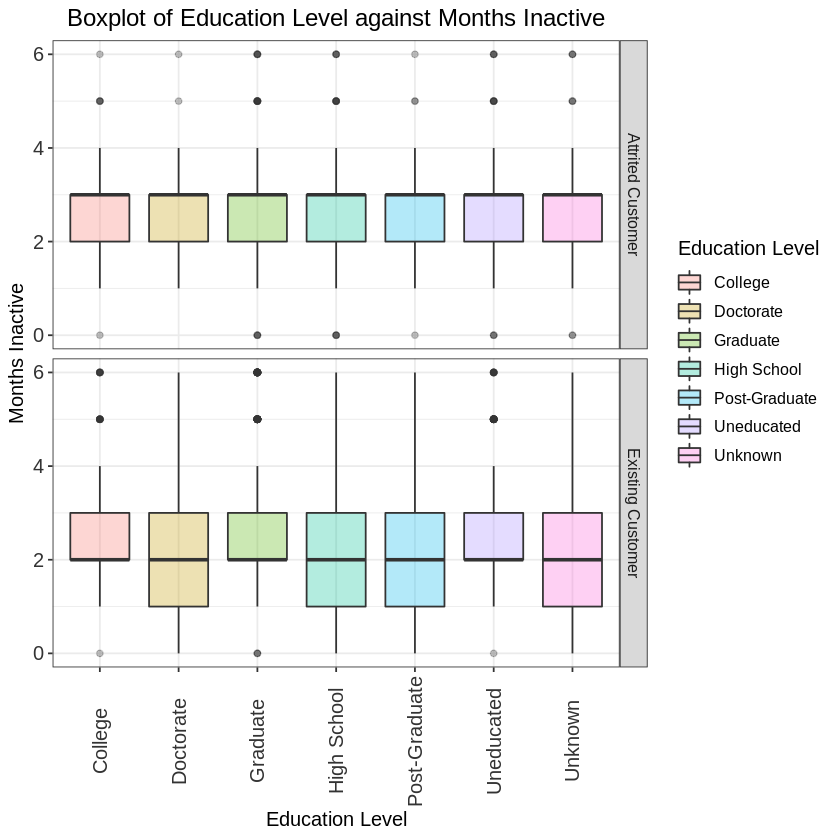

In [97]:
#Menampilkan boxplot relasi antara Education level dengan Months Inactive 12 Mon berdasarkan Education Level.
ggplot(data = cld_x, aes(x = Education_Level, y = Months_Inactive_12_mon, fill = Education_Level)) +
  geom_boxplot(alpha = .3) +
  labs(x = "Education Level", 
       y = "Months Inactive",
       title = "Boxplot of Education Level against Months Inactive") +
  scale_fill_discrete(name = "Education Level") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12, angle = 90,
                                   hjust = 0.5, vjust = 0.5),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 12)) +
  facet_grid(rows =  vars(Attrition_Flag))

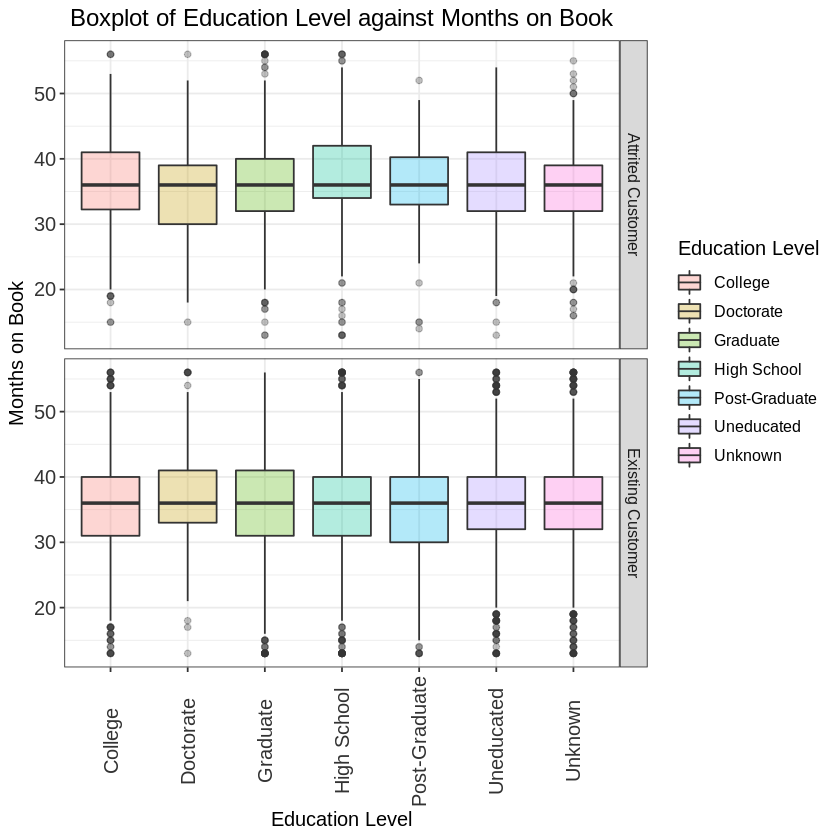

In [99]:
#Menampilkan boxplot relasi antara Education Level dengan Months on Book berdasarkan Education Level.
ggplot(data = cld_x, aes(x = Education_Level, y = Months_on_book, fill = Education_Level)) +
  geom_boxplot(alpha = .3) +
  labs(x = "Education Level", 
       y = "Months on Book",
       title = "Boxplot of Education Level against Months on Book") +
  scale_fill_discrete(name = "Education Level") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12, angle = 90,
                                   hjust = 0.5, vjust = 0.5),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 12)) +
  facet_grid(rows =  vars(Attrition_Flag)) 


#**Gender**

##### Akan dilakukan visualisasi data berdasarkan atribut Gender terhadap atribut yang lainnya dengan berbagai macam tipe plot yang ada.

##**A. Boxplot Gender**

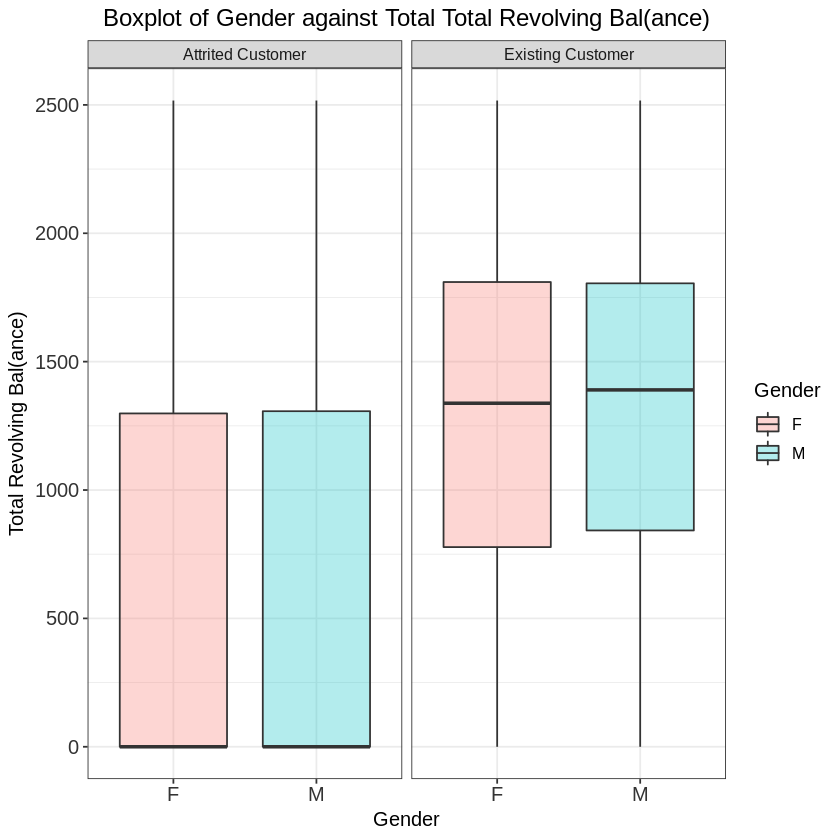

In [106]:
#Menampilkan boxplot relasi antara Gender dengan Total Revolving Bal berdasarkan Gender.
ggplot(data = cld_x, aes(x = Gender, y = Total_Revolving_Bal, fill = Gender)) +
  geom_boxplot(alpha = .3) +
  labs(x = "Gender", 
       y = "Total Revolving Bal(ance)", 
       title = "Boxplot of Gender against Total Total Revolving Bal(ance)") +
  scale_fill_discrete(name = "Gender") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 12)) +
  facet_grid(cols =  vars(Attrition_Flag)) 

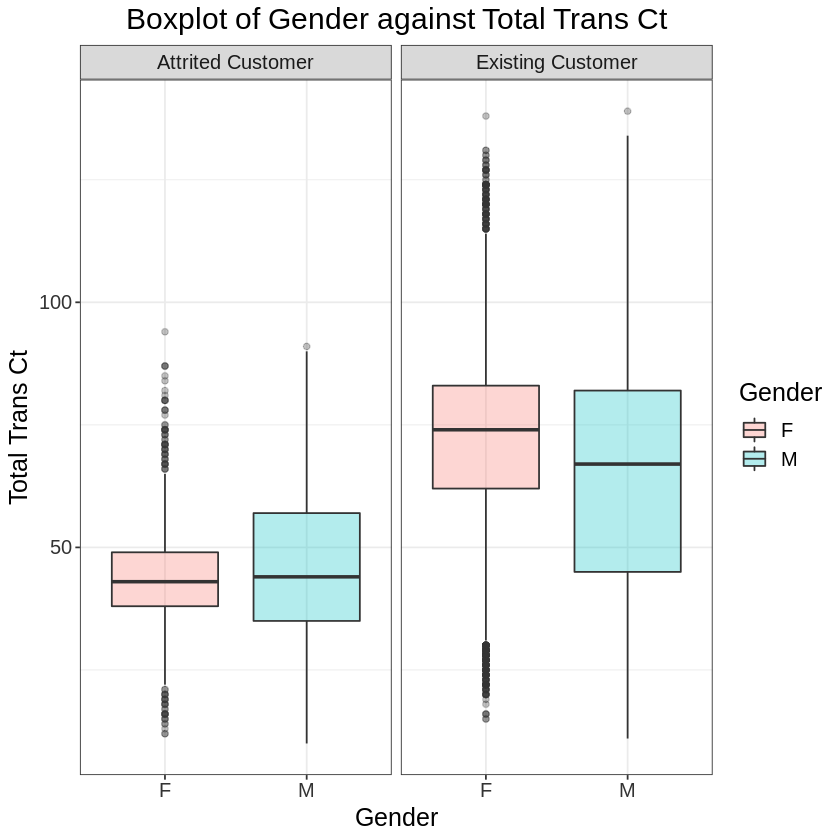

In [107]:
#Menampilkan boxplot relasi antara Gender dengan Total Trans Ct berdasarkan Gender.
ggplot(data = cld_x, aes(x = Gender, y = Total_Trans_Ct, fill = Gender)) +
  geom_boxplot(alpha = .3) +
  labs(x = "Gender", 
       y = "Total Trans Ct", 
       title = "Boxplot of Gender against Total Trans Ct") +
  scale_fill_discrete(name = "Gender") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 15)) +
  facet_wrap(~Attrition_Flag) 

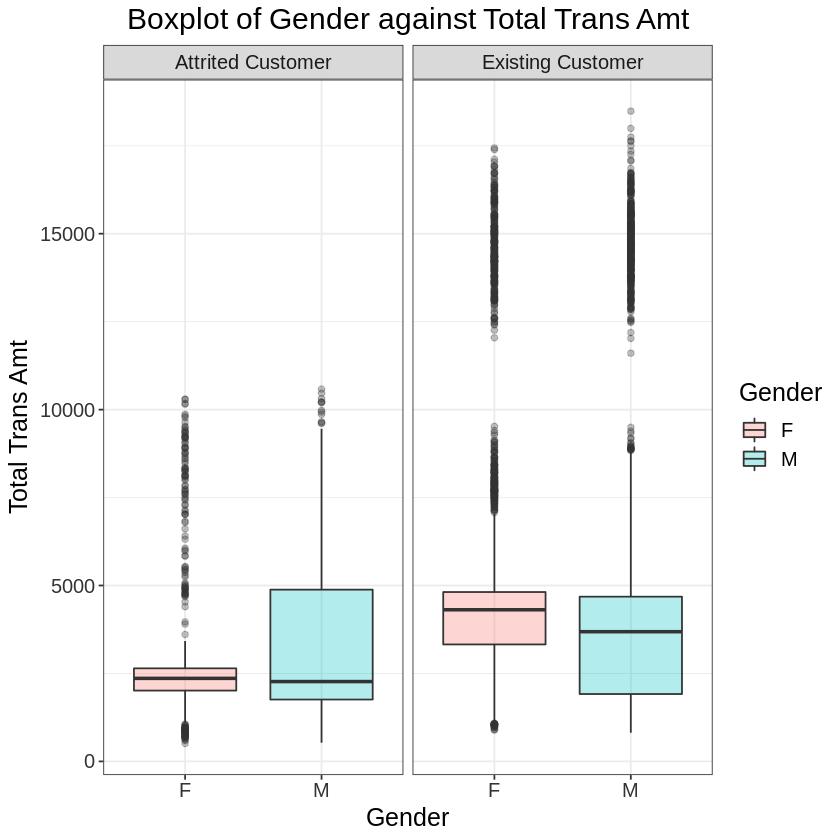

In [108]:
#Menampilkan boxplot relasi antara Gender dengan Total Trans Amt berdasarkan Gender.
ggplot(data = cld_x, aes(x = Gender, y = Total_Trans_Amt, fill = Gender)) +
  geom_boxplot(alpha = .3) +
  labs(x = "Gender", 
       y = "Total Trans Amt", 
       title = "Boxplot of Gender against Total Trans Amt") +
  scale_fill_discrete(name = "Gender") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 15)) +
  facet_grid(cols =  vars(Attrition_Flag)) 

#**Card Category**

##### Akan dilakukan visualisasi data berdasarkan atribut Card Category terhadap atribut yang lainnya dengan berbagai macam tipe plot yang ada.

##**A. Barplot**

###**A.1 Barplot distribusi frekuensi Card Category**
Visualisasi data dilakukan terhadap atribut kategori kartu (Card Category) untuk mencari tahu distribusi penyebaran pengguna kartu kredit berdasarkan tipe kartu yang digunakan. 

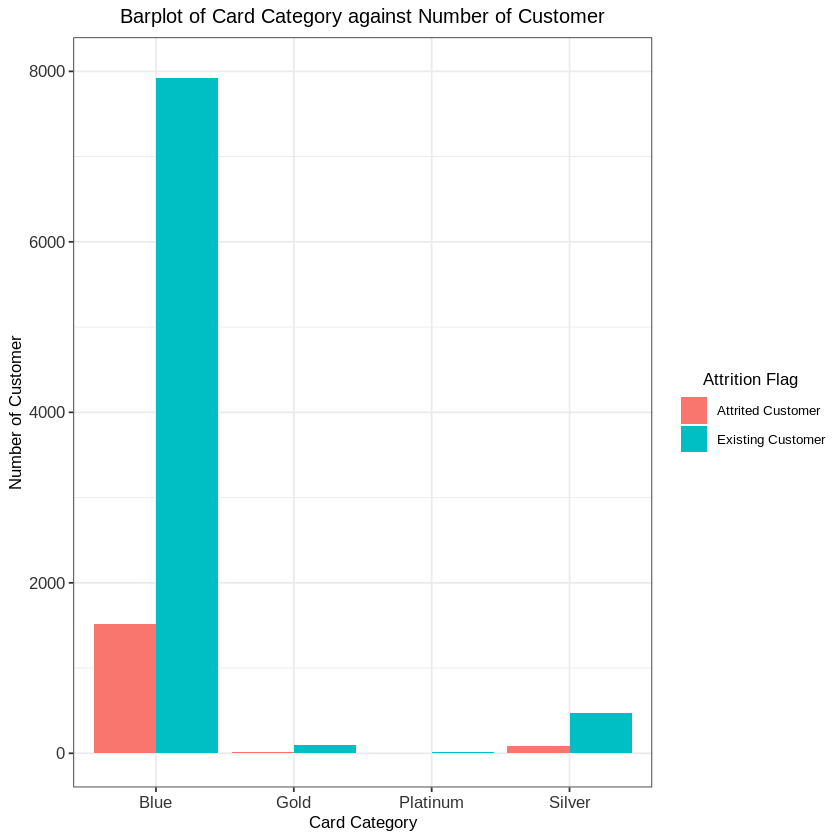

In [17]:
ggplot(data = cld_x, aes(x = Card_Category, fill = Attrition_Flag)) +
  geom_bar(position = "dodge") +
  labs(y = "Number of Customer",
       x = "Card Category", 
       title = "Barplot of Card Category against Number of Customer") +
  scale_fill_discrete(name = "Attrition Flag") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 10),
        axis.text.y = element_text(colour = "grey20", size = 10),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 10)) +
  coord_cartesian(ylim=c(0, 8000)) 

Berdasarkan barplot di atas, dapat disimpulkan bahwa:

*  Pengguna kartu kredit paling banyak, baik itu dari yang masih dan sudah berhenti berlangganan, diperoleh oleh pengguna kartu kredit yang menggunakan kartu bertipe *Blue* :

>>
*   Untuk yang masih berlangganan, pengguna merupakan yang tertinggi dengan pengguna mencapai hampir 8000 orang.
*   Untuk yang tidak lagi berlangganan, pengguna merupakan yang tertinggi dengan pengguna melebihi 1000 orang dan dibawah 2000 orang.

*  Pengguna kartu kredit paling banyak kedua, baik itu dari yang masih dan sudah berhenti berlangganan, diperoleh oleh pengguna kartu kredit yang bertipe *Silver* 

*  Untuk penggunaan kartu kredit bertipe *Gold*, terdapat perbedaan jumlah yang cukup terlihat antara pengguna yang masih berlangganan dengan yang tidak. 

*  Pengguna kartu kredit paling sedikit, untuk yang masih berlangganan, baik itu dari yang masih dan sudah berhenti berlangganan, diperoleh oleh pengguna kartu kredit yang bertipe *Platinum*.




####**A.1.1 Barplot distribusi frekuensi Card Category berdasarkan Marital Status**
Visualisasi data dilakukan terhadap atribut kategori kartu (Card Category) untuk mencari tahu distribusi penyebaran pengguna kartu kredit berdasarkan tipe kartu yang digunakan sekaligus melihat pengaruh status hubungan pengguna terhadap penggunaan jenis kartu kredit yang dipilih. 

In [ ]:
ggplot(data = cld_x, aes(x = Card_Category, fill = Marital_Status)) +
  geom_bar(position = "dodge") +
  labs(y = "Number of Customer",
       x = "Card Category", 
       title = "Barplot of Card Category against Number of Customer") +
  scale_fill_discrete(name = "Marital Status") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 15)) +
  facet_wrap(~Attrition_Flag)

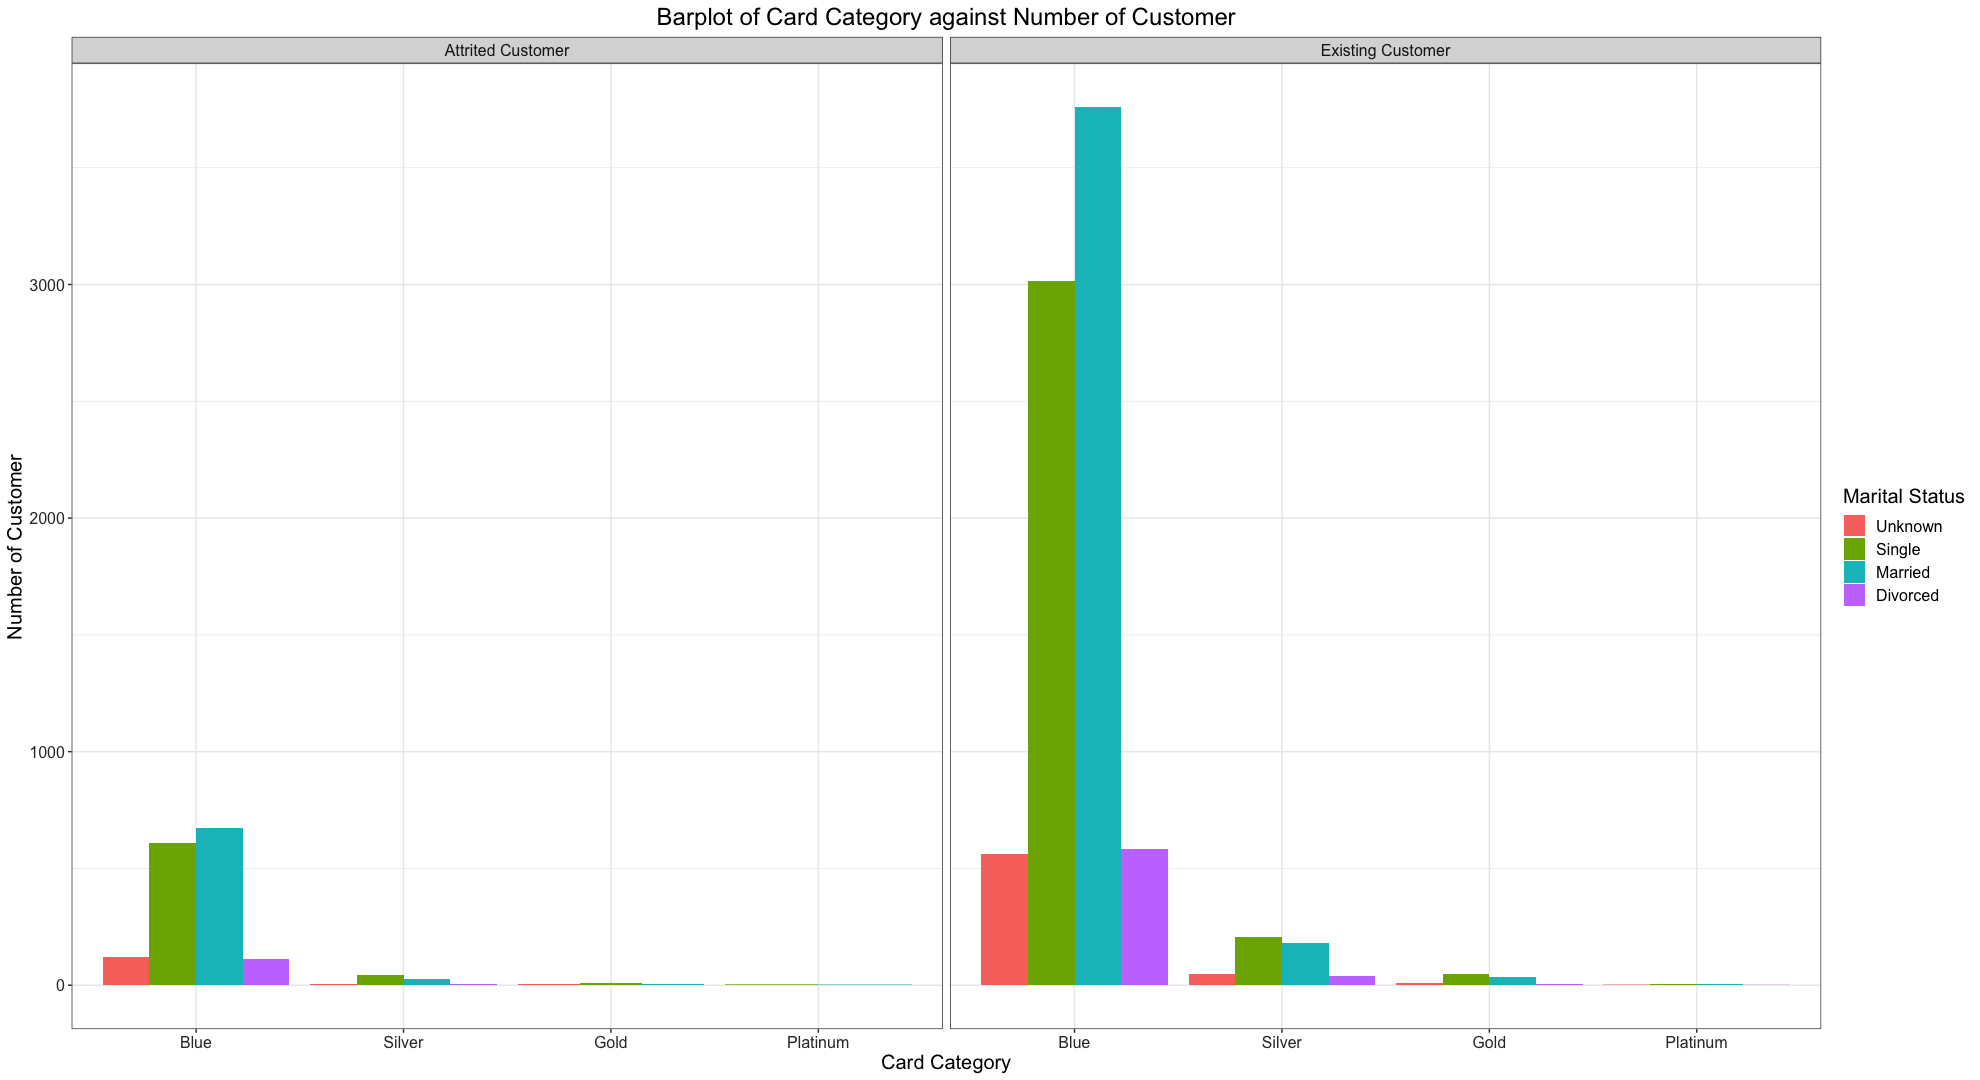

Berdasarkan barplot di atas dapat disimpulkan bahwa :

1.untuk pengguna yang masih berlangganan:

*   pada kategori ***Blue*** dapat dilihat bahwa:

>>
* pengguna yang paling banyak berada di kategori *Married*, dengan jumlah yang melebihi 3500 orang. 
* pengguna yang paling banyak kedua berada di kategori *Single*, dengan jumlah sekitar 3000 orang. 
* pengguna yang paling banyak ketiga dan keempat berada di kategori *Divorced* dan *Unknown*, dengan jumlah sekitar 500 orang. Kedua kategori ini memiliki perbedaan jumlah pengguna yang sedikit. 

*   pada kategori ***Silver*** dapat dilihat bahwa:

>>
* pengguna yang paling banyak berada di kategori *Single*.
* pengguna yang paling banyak kedua berada di kategori *Married*.
* pengguna yang paling banyak ketiga berada di kategori *Unknown*.
* pengguna yang paling banyak keempat berada di kategori *Divorced*.

*   pada kategori ***Gold*** dan ***Platinum*** dapat dilihat bahwa:

>>
* pengguna yang paling banyak berada di kategori *Single*.
* pengguna yang paling banyak kedua berada di kategori *Married*.
* pengguna yang berada di kategori *Unknown* dan *Divorced* memiliki jumlah pengguna yang setara dan hampir sama. 


2.untuk pengguna yang tidak lagi berlangganan:


*   pada kategori ***Blue*** dapat dilihat bahwa:

>>
* pengguna yang paling banyak berada di kategori *Married*.
* pengguna yang paling banyak kedua berada di kategori *Single*.
* pengguna yang paling banyak ketiga berada di kategori *Unknown*.
* pengguna yang paling banyak keempat berada di kategori *Divorced*.

*   pada kategori ***Silver*** dapat dilihat bahwa:

>>
* pengguna yang paling banyak berada di kategori *Single*.
* pengguna yang paling banyak kedua berada di kategori *Married*.
* pengguna yang paling banyak ketiga berada di kategori *Divorced*.
* pengguna yang paling banyak keempat berada di kategori *Unknown*.

*   pada kategori ***Gold*** dapat dilihat bahwa:

>>
* pengguna yang paling banyak berada di kategori *Single*.
* pengguna yang paling banyak kedua berada di kategori *Unknown* dan *Married* yang memiliki jumlah pengguna yang setara dan hampir sama.
* tidak ada pengguna yang berada di kategori *Divorced*. 

*   pada kategori ***Platinum*** dapat dilihat bahwa:

>>
* hanya terdapat pengguna yang berada di kategori *Single* dan *Married* yang memiliki jumlah pengguna yang setara dan hampir sama.
* tidak ada pengguna yang berada di kategori *Unknown* dan *Divorced*. 

###**A.2. Barplot Card Category berdasarkan Education Level**

Visualisasi data dilakukan terhadap atribut kategori kartu (Card Category) untuk mencari tahu distribusi penyebaran pengguna kartu kredit berdasarkan level edukasi pengguna. 

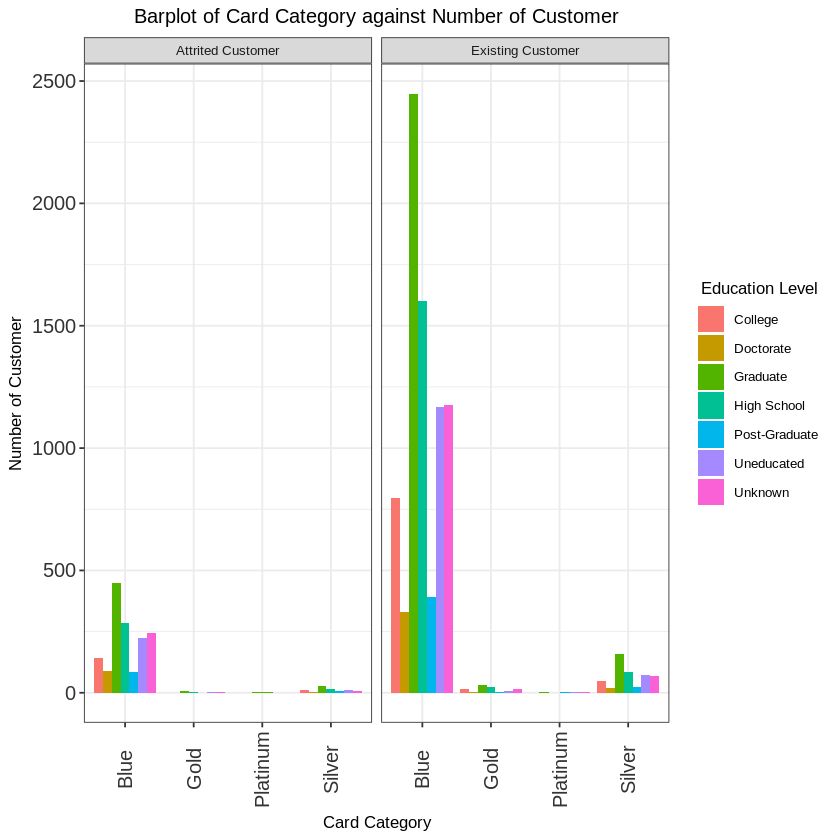

In [18]:
ggplot(data = cld_x, aes(x = Card_Category, fill = Education_Level)) +
  geom_bar(position = "dodge") +
  labs(x = "Card Category",
       y = "Number of Customer",
       title = "Barplot of Card Category against Number of Customer") +
  scale_fill_discrete(name = "Education Level") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12, angle = 90,
                                   hjust = 0.5, vjust = 0.5),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 10)) +
  facet_wrap(~Attrition_Flag)

Berdasarkan barplot di atas, dapat disimpulkan bahwa : 

1.   untuk pengguna yang masih berlangganan :

>>
*   secara garis besar, pengguna kartu bertipe *Blue* memiliki jumlah total pengguna yang paling banyak dibandingkan kartu bertipe lainnya. Jumlah total pengguna kartu yang paling banyak kemudian diikuti oleh kartu bertipe *Silver*, lalu *Gold*, dan yang terakhir adalah kartu bertipe *Platinum* dengan jumlah total pengguna yang paling sedikit. 
*   Untuk kategori kartu ***Blue*** di antaranya terdapat:

>>>
* pengguna kartu yang paling banyak berada di kategori *Graduate* dengan jumlah pengguna sekitar kurang dari 2500 orang.
* pengguna kartu yang paling banyak kedua berada di kategori *High School* dengan jumlah pengguna lebih dari 1500 orang.
* pengguna kartu yang paling banyak ketiga berada di kategori *Unknown* dengan jumlah pengguna di bawah 1250 orang.
* pengguna kartu yang paling banyak keempat berada di kategori *Uneducated* dengan jumlah pengguna di bawah 1250 orang.
* pengguna kartu yang paling banyak kelima berada di kategori *College* dengan jumlah pengguna sekitar 750 orang.
* pengguna kartu yang paling banyak keenam berada di kategori *Post-Graduate* dengan jumlah pengguna sekitar 300 orang.
* pengguna kartu yang paling banyak ketujuh berada di kategori *Doctorate* dengan jumlah pengguna sekitar 250 orang atau lebih.

>>
* Untuk kategori kartu ***Silver*** secara garis besar memiliki pola yang sama seperti kategori kartu *Blue*, akan tetapi disini jumlah pengguna kartu yang berada di kategori *Uneducated* melebihi jumlah pengguna kartu yang berada di kategori *Unknown*
>>>
*   Untuk kategori kartu ***Gold*** di antaranya terdapat:

>>>>
* pengguna kartu yang paling banyak berada di kategori *Graduate*.
* pengguna kartu yang paling banyak kedua berada di kategori *High School*.
* pengguna kartu yang paling banyak ketiga berada di kategori *Unknown*.
* pengguna kartu yang paling banyak keempat berada di kategori *College*.
* pengguna kartu yang paling banyak kelima berada di kategori *Uneducated*.
* pengguna kartu yang paling sedikit berada di kategori *Post-Graduate* dan *Doctorate*.

>>
* Untuk kategori kartu ***Platinum*** :

>>>
* pengguna kartu yang paling banyak berada di kategori *Graduate*.
* pengguna jenis kartu yang lainnya memiliki jumlah yang hampir sama. 

2.   untuk pengguna yang tidak lagi berlangganan :

>>
*   secara garis besar memiliki pola urutan jumlah pengguna yang sama seperti yang masih berlangganan, namun memiliki perbedaan pada jumlah pengguna kartu bertipe *Gold* dan *Platinum* :

>>>
*   jumlah pengguna yang tampak keberadaannya untuk kategori ***Gold*** pada barplot adalah pengguna yang berada di kategori *Graduate*, disusul dengan pengguna yang berada di kategori *Unknown*, *Uneducated* dan *High School* yang kemudian menyisakan garis yang sangat tipis untuk pengguna yang berada di kategori *College*, *Post-Graduate* dan *Doctorate*. Hal ini mengindikasikan terdapat sangat sedikit sekali pengguna kartu kredit bertipe ***Gold*** oleh pengguna yang berada di ketiga kategori terakhir tersebut. 
*untuk kategori kartu bertipe ***Platinum*** hanya terlihat garis yang sangat tipis untuk kategori tertentu seperti *Graduate*, *Post-Graduate*, dan *Doctorate*. Hal ini mengindikasikan terdapat sangat sedikit sekali pengguna kartu kredit bertipe ***Platinum*** oleh pengguna yang berada di ketiga kategori tersebut. 




##**B. Boxplot Card Category**


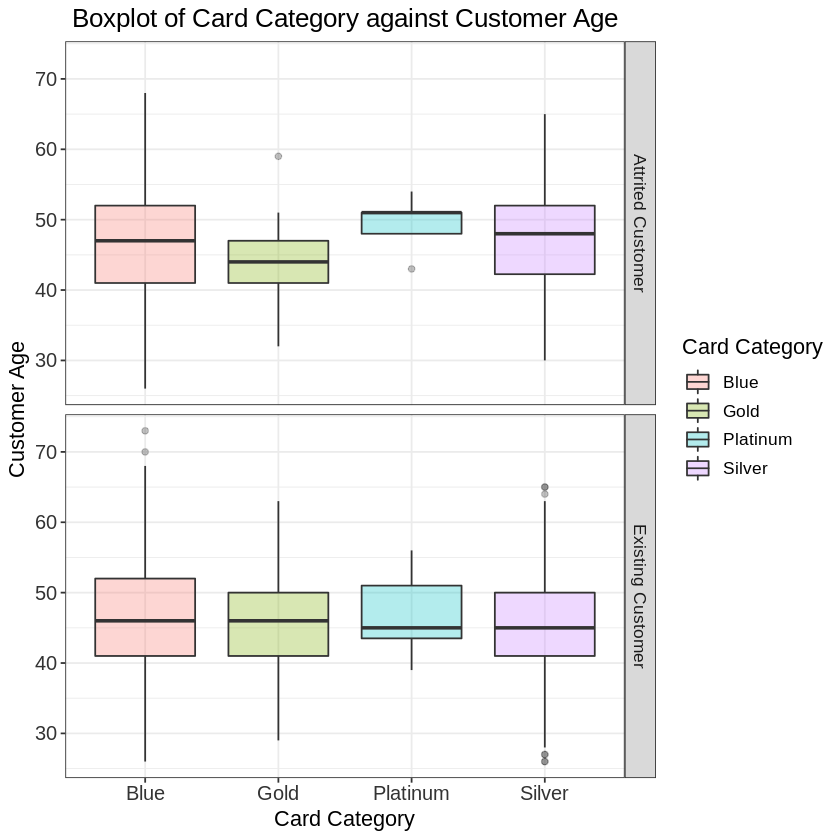

In [89]:
#Menampilkan boxplot relasi antara Card Category  dengan Customer Age berdasarkan Card Category.
ggplot(data = cld_x, aes(x = factor(Card_Category), y = Customer_Age, fill = Card_Category)) +
  geom_boxplot(alpha = .3) +
  labs(x = "Card Category", 
       y = "Customer Age",
       title = "Boxplot of Card Category against Customer Age") +
  scale_fill_discrete(name = "Card Category") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 13)) +
  facet_grid(rows = vars(Attrition_Flag))

#**Total Transfer Amount**

##### Akan dilakukan visualisasi data berdasarkan atribut Total Trans Amt terhadap atribut yang lainnya dengan berbagai macam tipe plot yang ada.

##**A. Scatterplot**

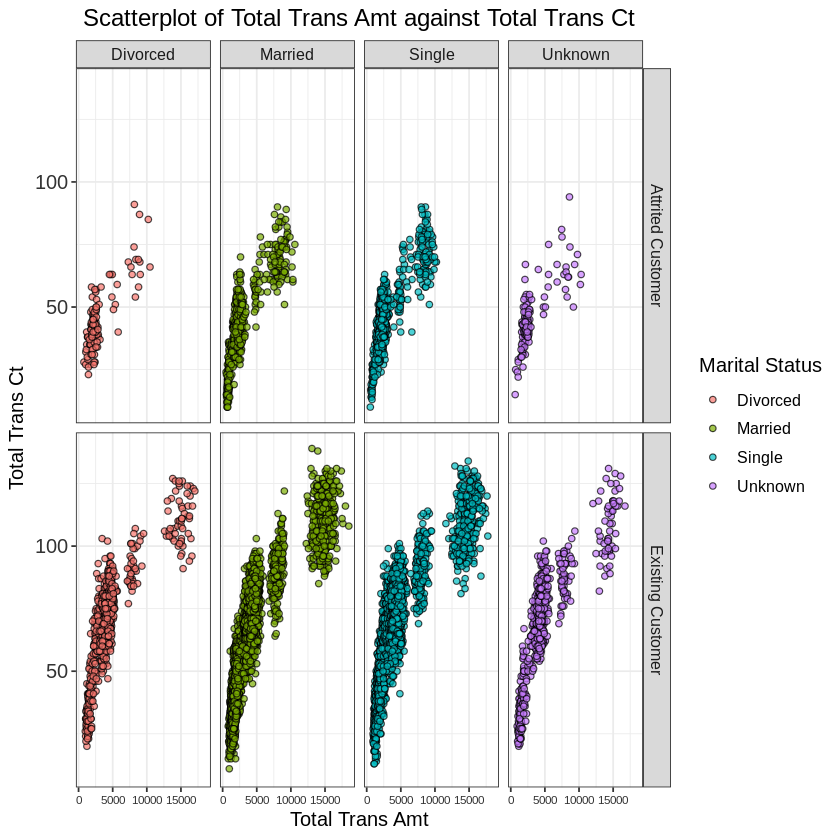

In [73]:
#Menampilkan scatterplot relasi antara Total Trans Amt dengan Total Trans Ct berdasarkan Marital Status. 
ggplot(data = cld_x, aes(x = Total_Trans_Amt, y = Total_Trans_Ct,  fill = Marital_Status)) +
  geom_point(alpha = .7, pch = 21) +
  labs(x = "Total Trans Amt", 
       y = "Total Trans Ct",
       title = "Scatterplot of Total Trans Amt against Total Trans Ct") +
  scale_fill_discrete(name = "Marital Status") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 7),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 12)) + 
  facet_grid(rows = vars(Attrition_Flag), cols = vars(Marital_Status))

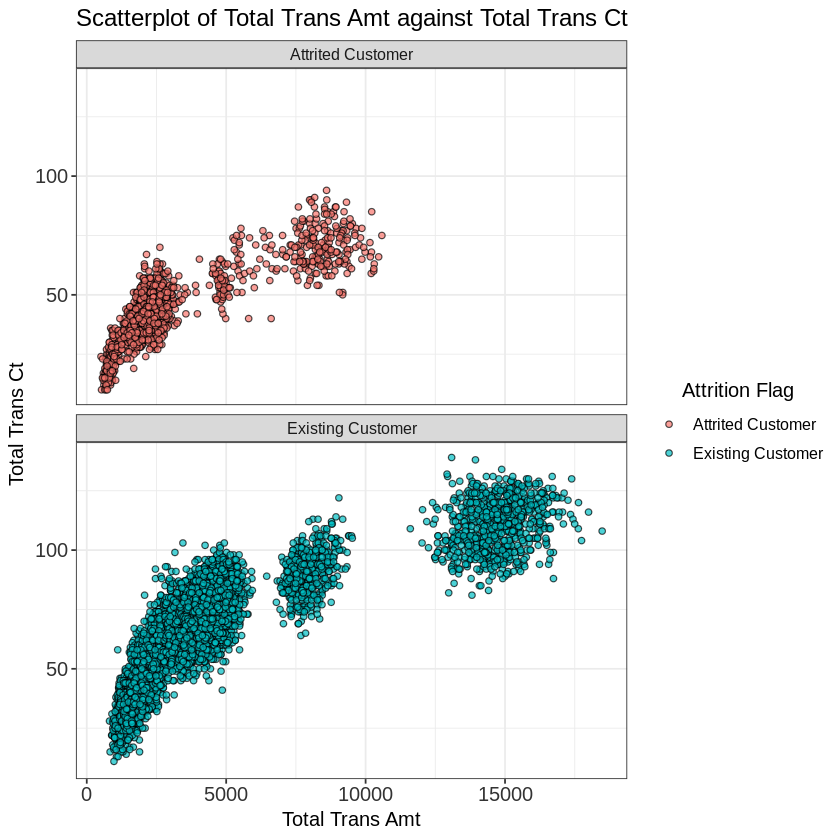

In [83]:
#Menampilkan scatterplot relasi antara Total Trans Amt dengan Total Trans Ct berdasarkan Attrition Flag.
ggplot(data = cld_x, aes(x = Total_Trans_Amt, y = Total_Trans_Ct, fill = Attrition_Flag)) +
  geom_point(alpha = .7, pch = 21) +
  labs(x = "Total Trans Amt", 
       y = "Total Trans Ct",
       title = "Scatterplot of Total Trans Amt against Total Trans Ct") +
  scale_fill_discrete(name = "Attrition Flag") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 12)) + 
  facet_wrap(~Attrition_Flag, nrow = 2)

#**Total Transfer Count**

##### Akan dilakukan visualisasi data berdasarkan atribut Total Trans Ct terhadap atribut yang lainnya dengan berbagai macam tipe plot yang ada.

##**A. Scatterplot**

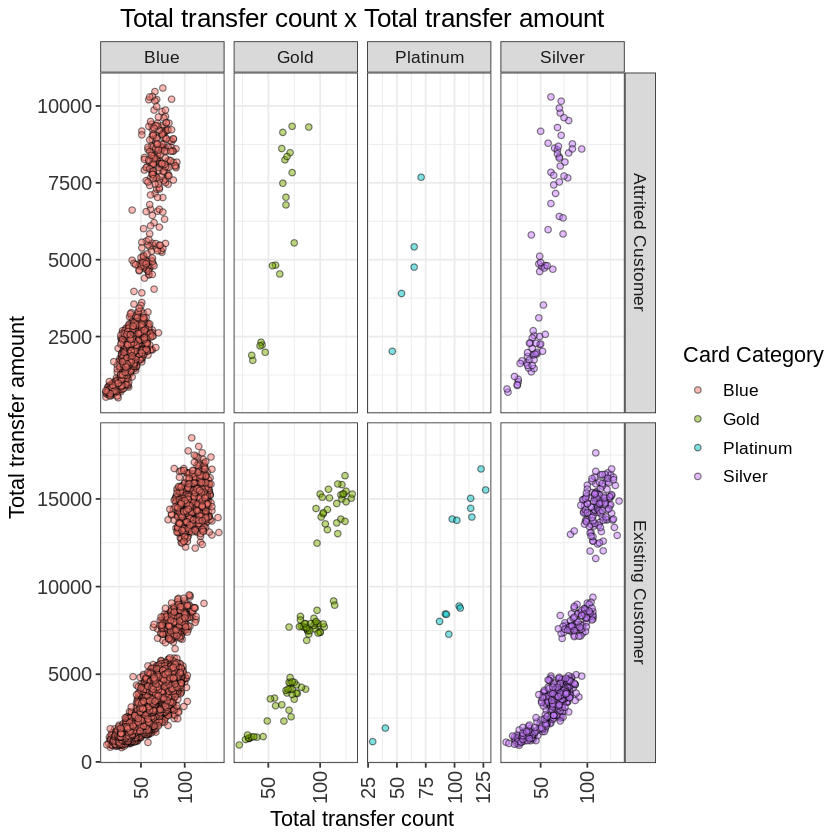

In [52]:
#Menampilkan scatterplot relasi antara Total Trans Ct dengan Total Trans Amt berdasarkan Card Category. 
ggplot(data = cld_x, aes(x = Total_Trans_Ct, y = Total_Trans_Amt, fill = Card_Category)) +
  geom_point(alpha = .5, pch = 21) +
  labs(title = "Total transfer count x Total transfer amount",
       x = "Total transfer count",
       y = "Total transfer amount") +
  scale_fill_discrete(name = "Card Category") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12, angle = 90,
                                   hjust = 0.5, vjust = 0.5),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        text = element_text(size = 13)) +
  facet_grid(rows = vars(Attrition_Flag), cols = vars(Card_Category),
             scales = "free")

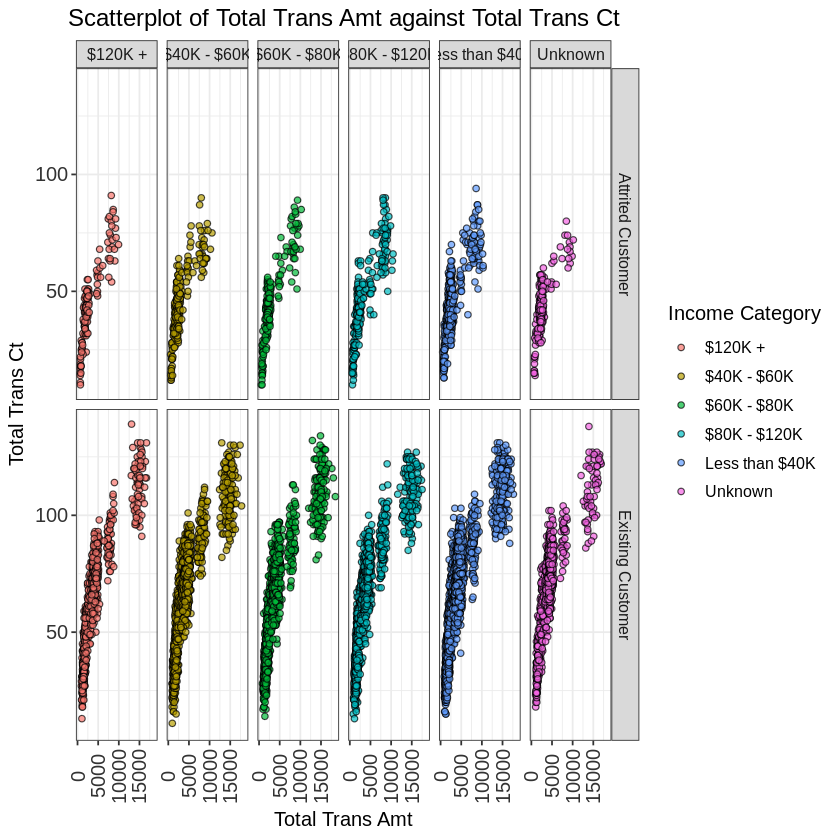

In [55]:
#Menampilkan scatterplot relasi antara Total Trans Amt dengan Total Trans Ct berdasarkan Income Category.
ggplot(data = cld_x, aes(x = Total_Trans_Amt, y = Total_Trans_Ct, fill = Income_Category)) +
  geom_point(alpha = .7, pch = 21) +
  labs(x = "Total Trans Amt", 
       y = "Total Trans Ct",
       title = "Scatterplot of Total Trans Amt against Total Trans Ct") +
  scale_fill_discrete(name = "Income Category") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12, angle = 90,
                                   hjust = 0.5, vjust = 0.5),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 12)) + 
  facet_grid(rows = vars(Attrition_Flag), cols = vars(Income_Category))

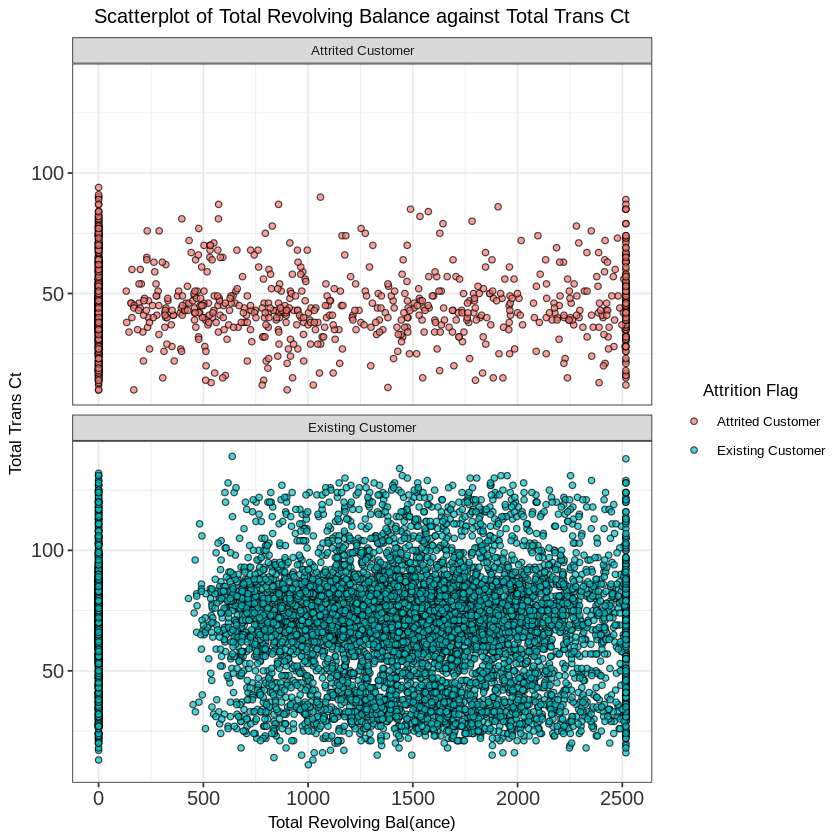

In [77]:
#Menampilkan scatterplot relasi antara Total Revolving Bal dengan Total Trans Ct berdasarkan Attrition Flag.
ggplot(data = cld_x, aes(x = Total_Revolving_Bal, y = Total_Trans_Ct, fill = Attrition_Flag)) +
  geom_point(alpha = .7, pch = 21) +
  labs(x = "Total Revolving Bal(ance)", 
       y = "Total Trans Ct",
       title = "Scatterplot of Total Revolving Balance against Total Trans Ct") +
  scale_fill_discrete(name = "Attrition Flag") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 10)) + 
  facet_wrap(~Attrition_Flag, nrow = 2)

#**Total Revolving Balance**

##### Akan dilakukan visualisasi data berdasarkan atribut Total Revolving Bal terhadap atribut yang lainnya dengan berbagai macam tipe plot yang ada.

##**A. Scatterplot**

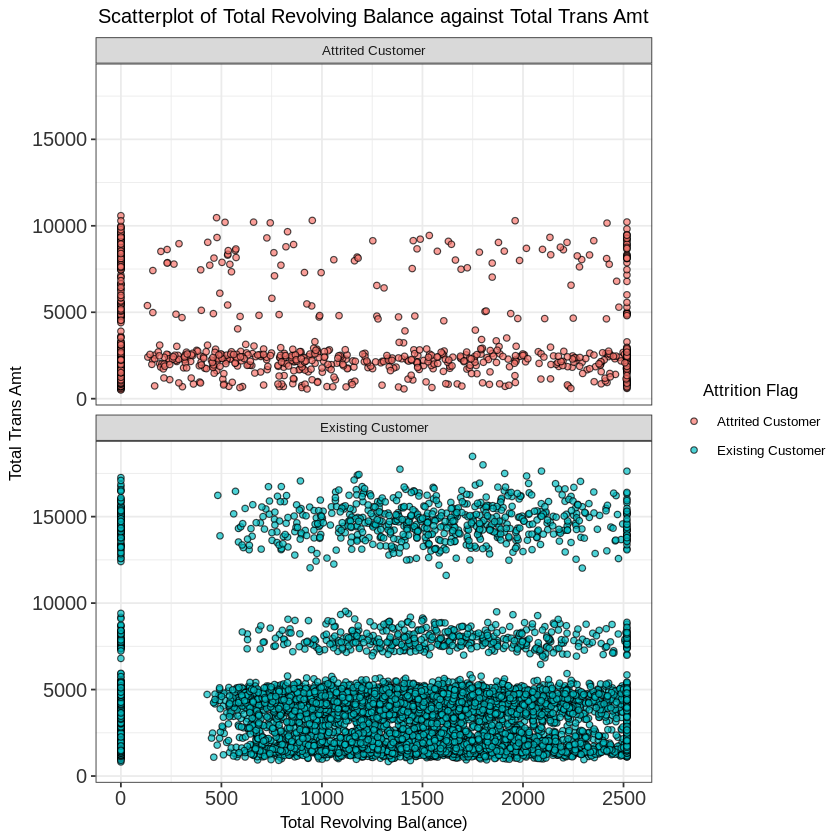

In [80]:
#Menampilkan scatterplot relasi antara Total Revolving Bal dengan Total Trans Amt berdasarkan Attrition Flag.
ggplot(data = cld_x, aes(x = Total_Revolving_Bal, y = Total_Trans_Amt, fill = Attrition_Flag)) +
  geom_point(alpha = .7, pch = 21) +
  labs(x = "Total Revolving Bal(ance)", 
       y = "Total Trans Amt",
       title = "Scatterplot of Total Revolving Balance against Total Trans Amt") +
  scale_fill_discrete(name = "Attrition Flag") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 10)) + 
  facet_wrap(~Attrition_Flag, nrow = 2)

#**Credit Limit**

##### Akan dilakukan visualisasi data berdasarkan atribut Credit Limit terhadap atribut yang lainnya dengan berbagai macam tipe plot yang ada.

##**A. Boxplot**

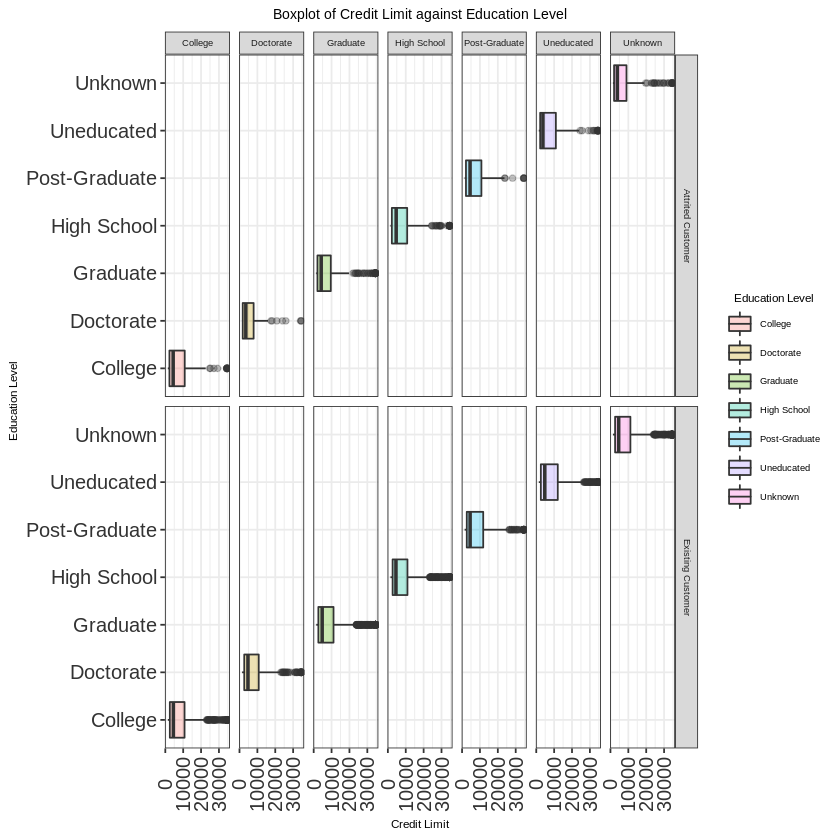

In [13]:
#Menampilkan scatterplot relasi antara Credit Limit dengan Education Level berdasarkan Education Level.
ggplot(data = cld_x, aes(x = Credit_Limit, y = Education_Level, fill = Education_Level)) +
  geom_boxplot(alpha = .3) +
  labs(x = "Credit Limit", 
       y = "Education Level", 
       title = "Boxplot of Credit Limit against Education Level") +
  scale_fill_discrete(name = "Education Level") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12, angle = 90,
                                   hjust = 0.5, vjust = 0.5),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 7)) +
  facet_grid(rows = vars(Attrition_Flag), cols =  vars(Education_Level))

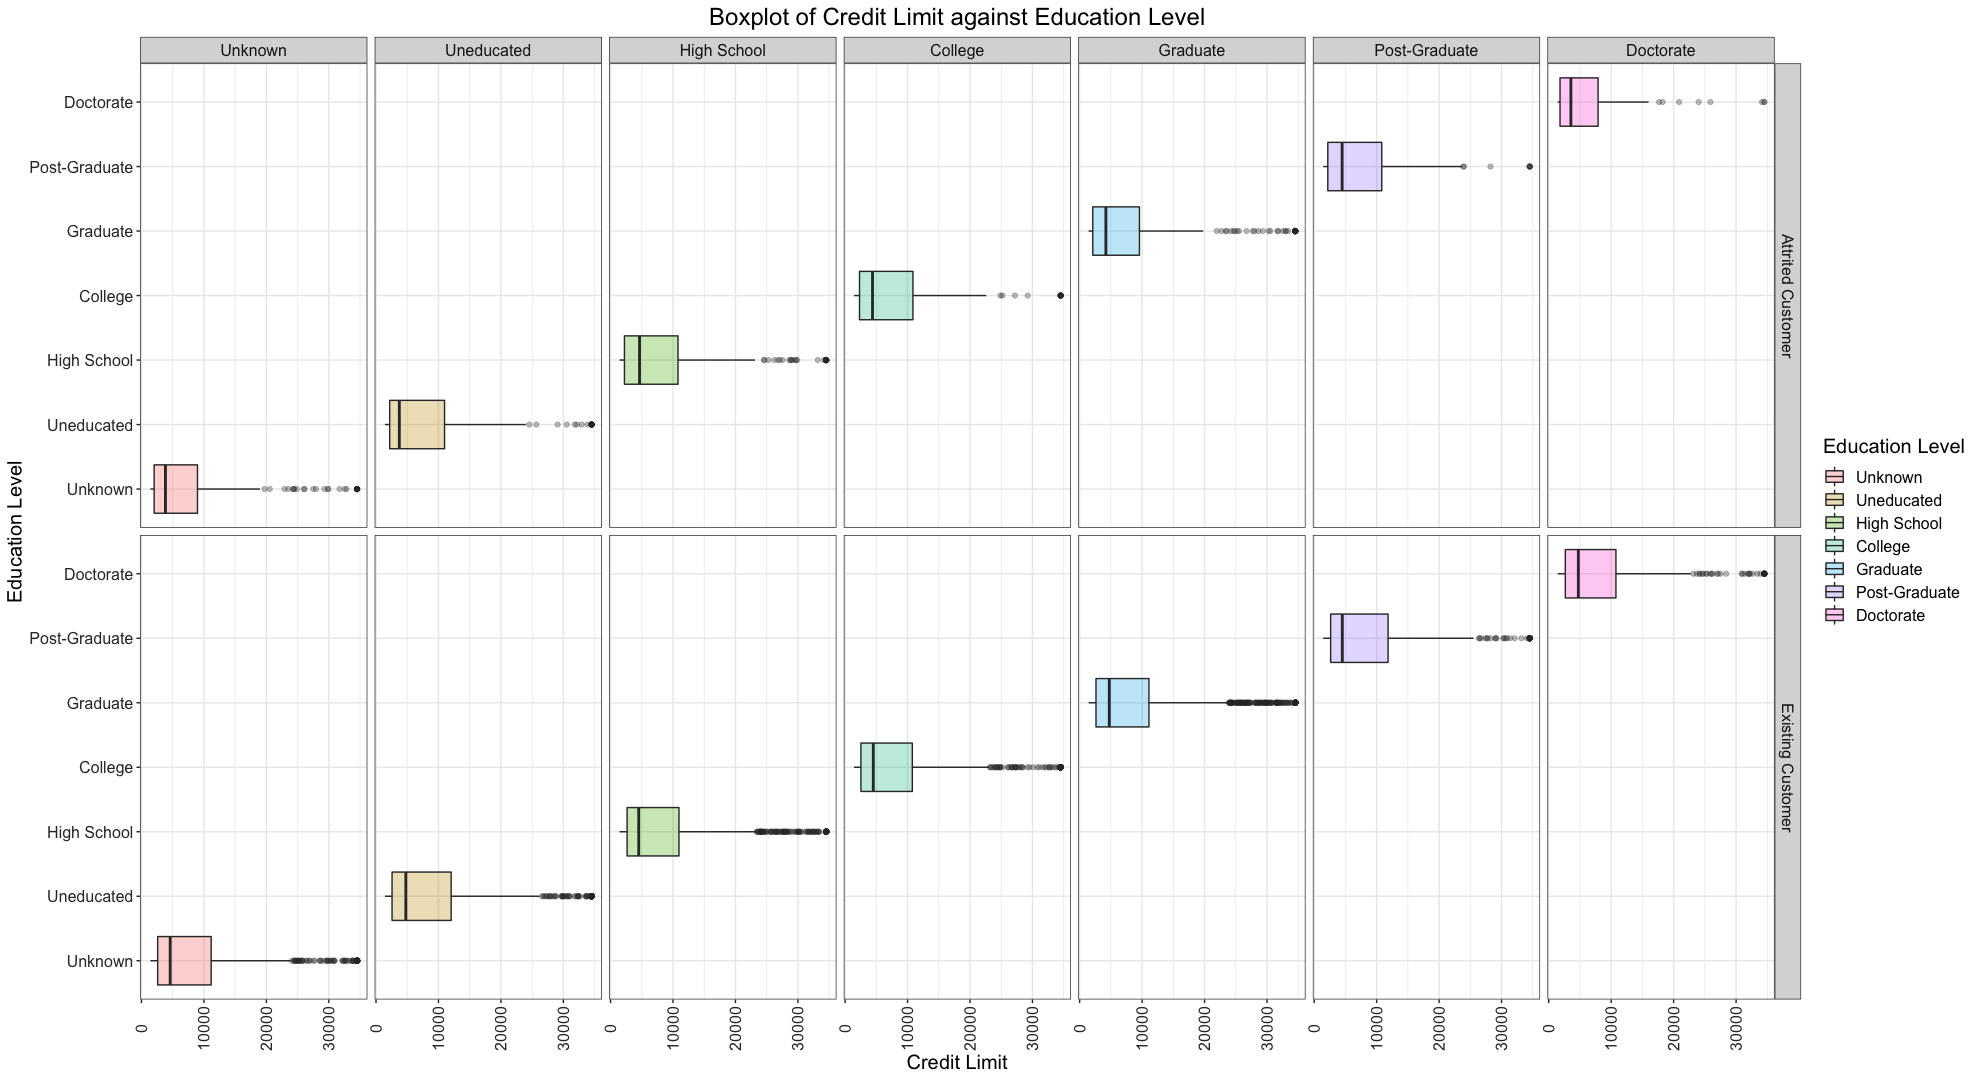

##**B. Scatterplot**

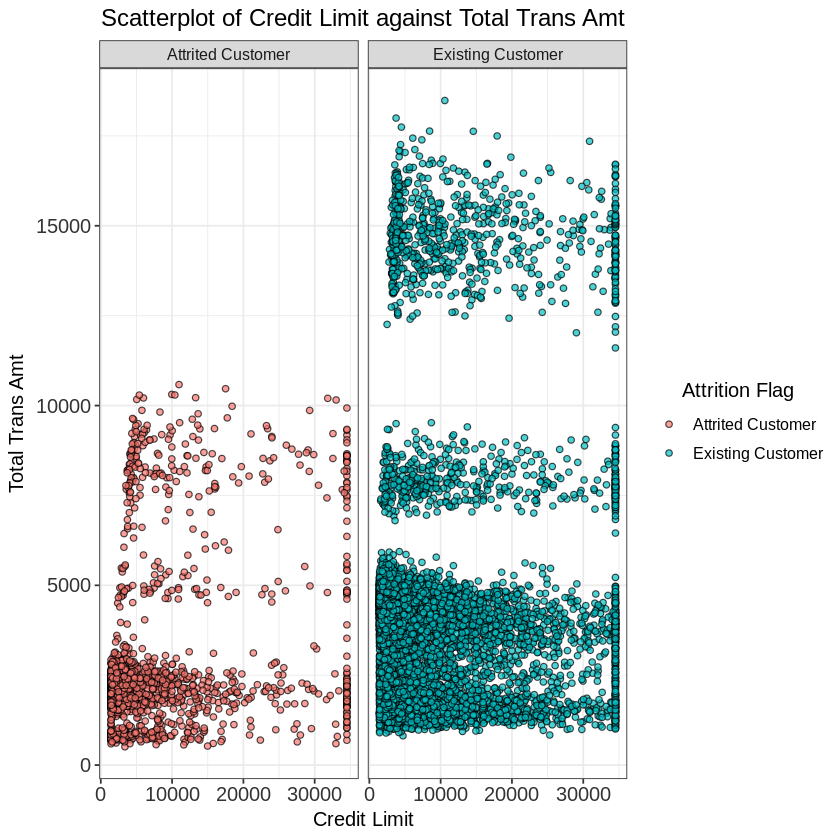

In [64]:
#Menampilkan scatterplot relasi antara Credit Limit dengan Total Trans Amt berdasarkan Attrition Flag.
ggplot(data = cld_x, aes(x = Credit_Limit, y = Total_Trans_Amt, fill = Attrition_Flag)) +
  geom_point(alpha = .7, pch = 21) +
  labs(x = "Credit Limit", 
       y = "Total Trans Amt",
       title = "Scatterplot of Credit Limit against Total Trans Amt") +
  scale_fill_discrete(name = "Attrition Flag") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 12)) + 
  facet_wrap(~Attrition_Flag, ncol = 2)

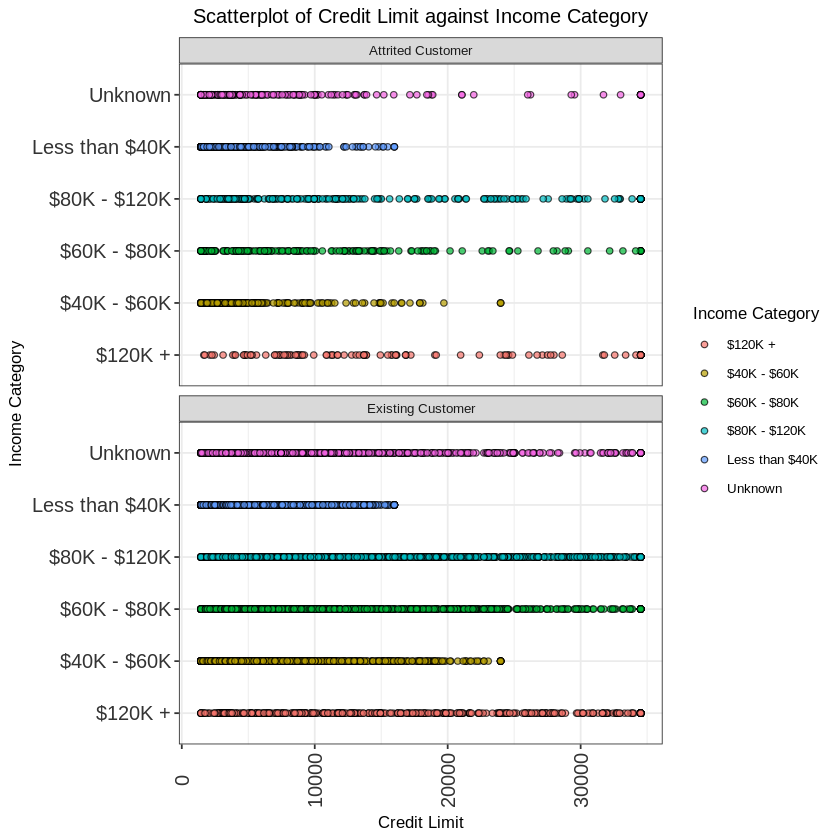

In [67]:
#Menampilkan scatterplot relasi antara Total Trans Amt dengan Total Trans Ct berdasarkan Attrition Flag.
ggplot(data = cld_x, aes(x = Credit_Limit, y = Income_Category, fill = Income_Category)) +
  geom_point(alpha = .7, pch = 21) +
  labs(x = "Credit Limit", 
       y = "Income Category",
       title = "Scatterplot of Credit Limit against Income Category") +
  scale_fill_discrete(name = "Income Category") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12, angle = 90,
                                   hjust = 0.5, vjust = 0.5),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 10)) + 
  facet_wrap(~Attrition_Flag, nrow = 2)

#**Income Category**

##### Akan dilakukan visualisasi data berdasarkan atribut Income Category terhadap atribut yang lainnya dengan berbagai macam tipe plot yang ada.

##**A. Barplot**

###**A.1 Barplot distribusi frekuensi Income Category**

Visualisasi data dilakukan terhadap atribut kategori pendapatan pengguna (Income Category) untuk mencari tahu distribusi penyebaran pengguna kartu kredit berdasarkan pendapatan pengguna. 

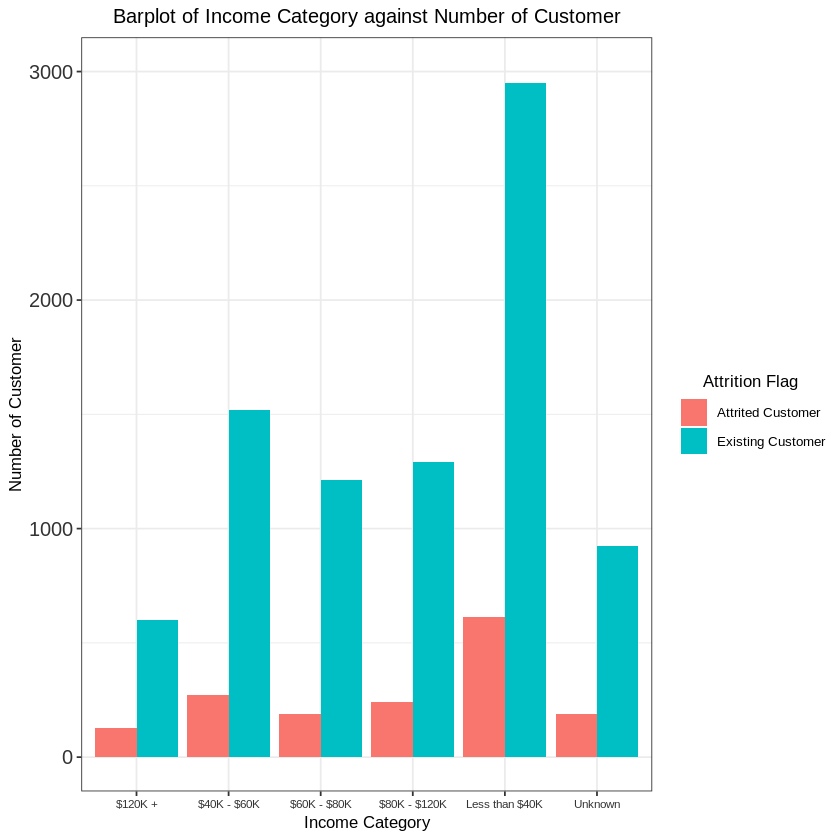

In [15]:
ggplot(data = cld_x, aes(x = Income_Category, fill = Attrition_Flag)) +
  geom_bar(position = "dodge") +
  labs(y = "Number of Customer",
       x = "Income Category", 
       title = "Barplot of Income Category against Number of Customer") +
  scale_fill_discrete(name = "Attrition Flag") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 7),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 10)) +
  coord_cartesian(ylim=c(0, 3000)) 

Berdasarkan barplot di atas, dapat disimpulkan bahwa:

1.   untuk pengguna kartu kredit yang masih berlangganan:

>>
*   pengguna yang paling tinggi jumlahnya merupakan pengguna dengan pendapatan kurang dari USD 40 ribu, dengan jumlah pengguna mencapai hampir 3000 orang. 
*   jumlah pengguna yang paling tinggi kedua merupakan pengguna dengan pendapatan diantara USD 40 ribu - USD 60 ribu, dengan jumlah pengguna melebihi 1500 orang. 
*   jumlah pengguna yang paling tinggi ketiga merupakan pengguna dengan pendapatan diantara USD 80 ribu - USD 120 ribu, dengan jumlah pengguna di bawah 1500 orang. 
*   jumlah pengguna yang paling tinggi keempat merupakan pengguna dengan pendapatan diantara USD 60 ribu - USD 80 ribu, dengan jumlah pengguna melebihi 1000 orang. 
*   jumlah pengguna yang paling tinggi kelima merupakan pengguna dengan pendapatan yang tidak diketahui, dengan jumlah pengguna di bawah 1000 orang. 
*   jumlah pengguna yang paling tinggi keenam merupakan pengguna dengan pendapatan melebihi USD 120 ribu, dengan jumlah pengguna diatas 500 orang. 


2.   untuk pengguna kartu kredit yang tidak lagi berlangganan:

>>
*   pengguna yang paling tinggi jumlahnya merupakan pengguna dengan pendapatan kurang dari USD 40 ribu. 
*   jumlah pengguna yang paling tinggi kedua merupakan pengguna dengan pendapatan diantara USD 40 ribu - USD 60 ribu. 
*   jumlah pengguna yang paling tinggi ketiga merupakan pengguna dengan pendapatan diantara USD 80 ribu - USD 120 ribu.
*   jumlah pengguna yang paling tinggi keempat merupakan pengguna dengan pendapatan diantara USD 60 ribu - USD 80 ribu. 
*   jumlah pengguna yang paling tinggi kelima merupakan pengguna dengan pendapatan yang tidak diketahui. 
*   jumlah pengguna yang paling tinggi keenam merupakan pengguna dengan pendapatan melebihi USD 120 ribu. 

###**A.2. Barplot Income Category berdasarkan Card Category**

Visualisasi data dilakukan terhadap atribut kategori pendapatan pengguna (Income Category) untuk mencari tahu distribusi penyebaran pengguna kartu kredit berdasarkan jenis kartu yang digunakan. 

In [ ]:
ggplot(data = cld_x, aes(x = Income_Category, fill = Card_Category))+
  geom_bar() +
  labs(x = "Income Category",
       y = "Number of Customer",
       title = "Barplot of Income Category against Number of Customer") +
  scale_fill_discrete(name = "Card Category") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12, angle = 90,
                                   hjust = 0.5, vjust = 0.5),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 10)) +
  facet_grid(rows = vars(Attrition_Flag), cols = vars(Card_Category),
             scales = "free")

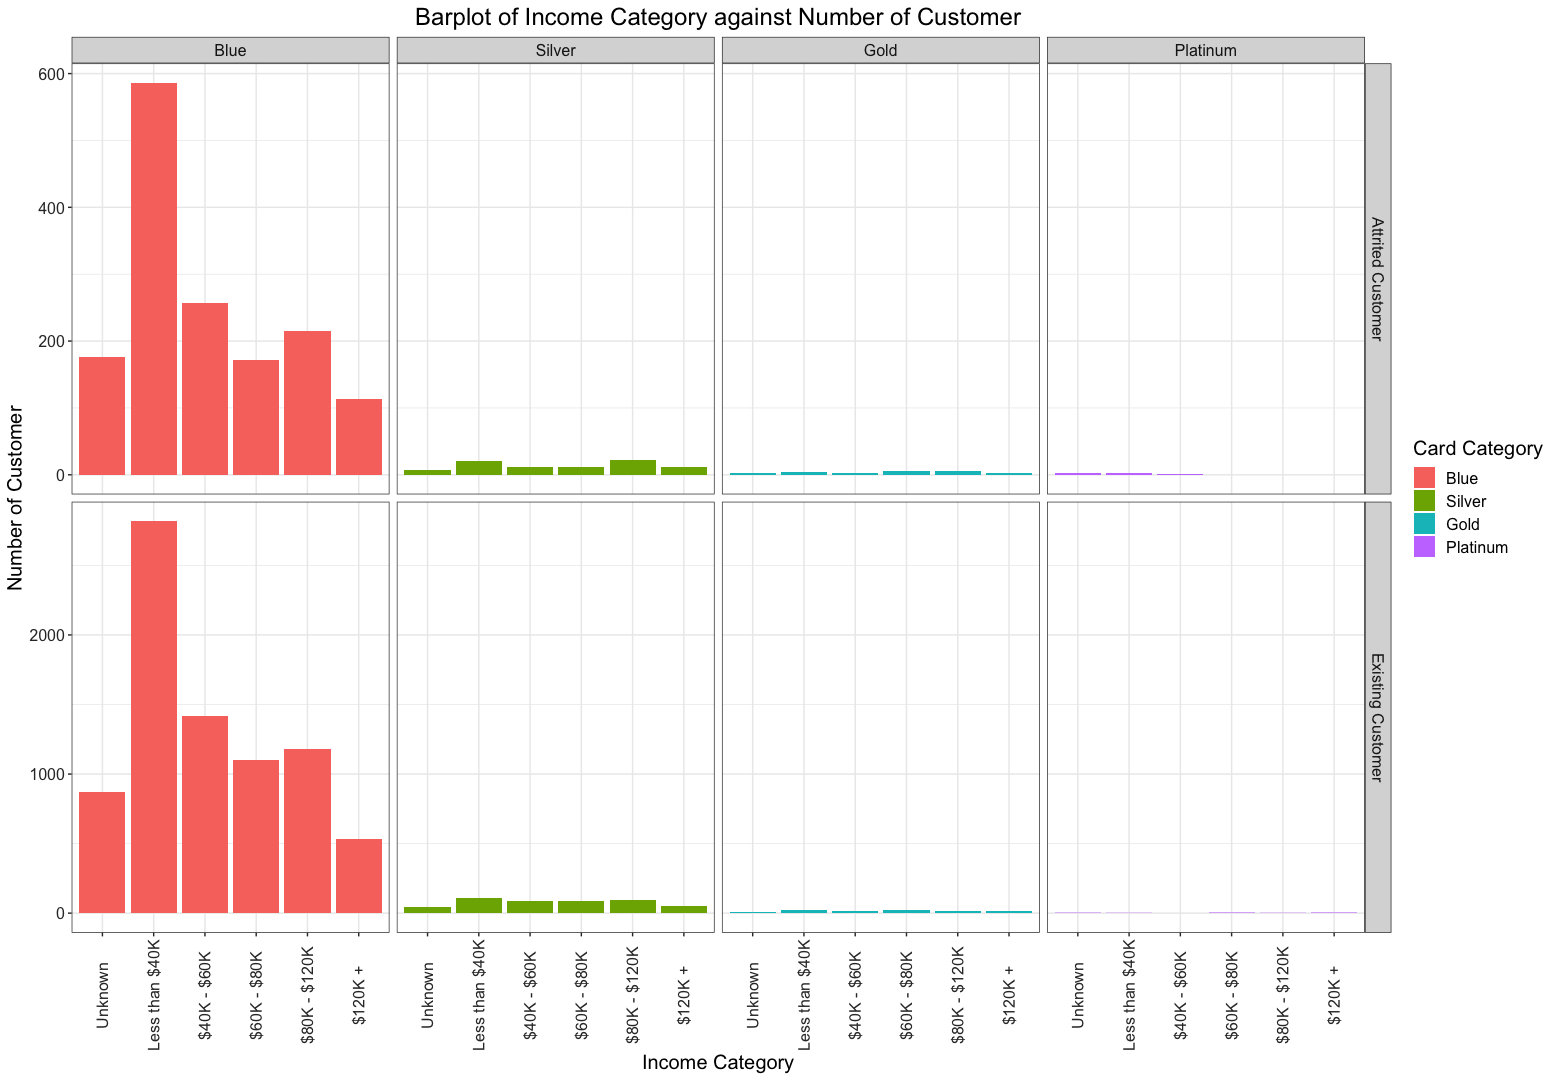

Berdasarkan barplot di atas, dapat disimpulkan bahwa untuk pengguna kartu kredit bertipe :

>*Blue* 

>>
1.   untuk pengguna kartu kredit yang masih berlangganan:

>>>
*   pengguna yang paling tinggi jumlahnya merupakan pengguna dengan pendapatan kurang dari USD 40 ribu, dengan jumlah pengguna jauh melebihi 2000 orang. 
*   jumlah pengguna yang paling tinggi kedua merupakan pengguna dengan pendapatan diantara USD 40 ribu - USD 60 ribu, dengan jumlah pengguna di bawah 1500 orang. 
*   jumlah pengguna yang paling tinggi ketiga merupakan pengguna dengan pendapatan diantara USD 80 ribu - USD 120 ribu, dengan jumlah pengguna di bawah 1500 orang dan di atas 1000 orang. 
*   jumlah pengguna yang paling tinggi keempat merupakan pengguna dengan pendapatan diantara USD 60 ribu - USD 80 ribu, dengan jumlah pengguna melebihi 1000 orang. 
*   jumlah pengguna yang paling tinggi kelima merupakan pengguna dengan pendapatan yang tidak diketahui, dengan jumlah pengguna di bawah 1000 orang. 
*   jumlah pengguna yang paling tinggi keenam merupakan pengguna dengan pendapatan melebihi USD 120 ribu, dengan jumlah pengguna diatas 500 orang. 

>>
2.   untuk pengguna kartu kredit yang tidak lagi berlangganan:

>>>
*   pengguna yang paling tinggi jumlahnya merupakan pengguna dengan pendapatan kurang dari USD 40 ribu, dengan jumlah di bawah 600 orang. 
*   jumlah pengguna yang paling tinggi kedua merupakan pengguna dengan pendapatan diantara USD 40 ribu - USD 60 ribu, dengan jumlah sekitar 250 orang.  
*   jumlah pengguna yang paling tinggi ketiga merupakan pengguna dengan pendapatan diantara USD 80 ribu - USD 120 ribu, dengan jumlah di atas 200 orang. 
*   jumlah pengguna yang paling tinggi keempat merupakan pengguna dengan pendapatan yang tidak diketahui, dengan jumlah di bawah 200 orang. 
*   jumlah pengguna yang paling tinggi kelima merupakan pengguna dengan pendapatan di antara USD 60 ribu - USD 80 ribu, dengan jumlah di bawah 200 orang. 
*   jumlah pengguna yang paling tinggi keenam merupakan pengguna dengan pendapatan melebihi USD 120 ribu, dengan jumlah di atas 100 orang. 

>*Silver* 

>>
1.   untuk pengguna kartu kredit yang masih berlangganan:

>>>
*   pengguna yang paling tinggi jumlahnya merupakan pengguna dengan pendapatan kurang dari USD 40 ribu.  
*   pengguna dengan pendapatan di antara USD 40 ribu - USD 60 ribu, USD 60 ribu - USD 80 ribu, dan USD 80 ribu - USD 120 ribu memiliki jumlah pengguna yang hampir sama. 
*   pengguna dengan pendapatan yang tidak diketahui dan juga pengguna yang pendapatannya melebihi USD 120 ribu memiliki jumlah pengguna yang hampir sama dan merupakan jumlah pengguna yang paling sedikit.  

>>
2.   untuk pengguna kartu kredit yang tidak lagi berlangganan:

>>>
*   pengguna yang paling tinggi jumlahnya merupakan pengguna dengan pendapatan kurang dari USD 40 ribu dan juga pengguna dengan pendapatan diantara USD 80 ribu - USD 120 ribu. Keduanya memiliki jumlah pengguna yang hampir sama. 
*   pengguna dengan pendapatan di antara USD 40 ribu - USD 60 ribu, USD 60 ribu - USD 80 ribu, dan pendapatan lebih dari USD 120 ribu memiliki jumlah pengguna yang hampir sama. 
*   pengguna dengan pendapatan yang tidak diketahui memiliki jumlah pengguna yang paling sedikit.  

>*Gold* 
>>
1.   untuk pengguna kartu kredit yang masih berlangganan:

>>>
*   pengguna yang paling tinggi jumlahnya merupakan pengguna dengan pendapatan di antara  USD 60 ribu - USD 80 ribu.  
*   pengguna yang paling tinggi kedua jumlahnya merupakan pengguna dengan pendapatan kurang dari USD 40 ribu.
*   pengguna dengan pendapatan di antara USD 80 ribu - USD 120 ribu dan  pengguna dengan pendapatan lebih dari USD 120 ribu memiliki jumlah pengguna yang hampir sama. 
*   pengguna dengan pendapatan yang tidak diketahui merupakan jumlah pengguna yang paling sedikit. 
*   pengguna dengan pendapatan di antara  USD 40 ribu - USD 60 ribu memiliki jumlah pengguna yang paling sedikit kedua. 
 
>>
2.   untuk pengguna kartu kredit yang tidak lagi berlangganan:

>>>
*   pengguna yang paling tinggi jumlahnya merupakan pengguna dengan pendapatan di antara USD 60 ribu - USD 80 ribu. 
*   pengguna yang paling tinggi kedua jumlahnya merupakan pengguna dengan pendapatan di antara USD 80 ribu - USD 120 ribu. 
*   pengguna yang paling tinggi ketiga jumlahnya merupakan pengguna dengan pendapatan di bawah USD 40 ribu.
*   pengguna dengan pendapatan yang tidak diketahui, juga pengguna dengan pendapatan di antara USD 40 ribu - USD 60 ribu dan melebihi USD 120 ribu memiliki jumlah pengguna yang hampir sama dan merupakan jumlah pengguna yang paling sedikit. 

>*Platinum* 

>>
1.   untuk pengguna kartu kredit yang masih berlangganan:

>>>
*   pengguna terdiri dari pengguna dengan pendapatan yang tidak diketahui, pendapatan kurang dari USD 40 ribu, pendapatan di antara USD 60 ribu - USD 80 ribu, USD 80 ribu - USD 120 ribu dan pendapatan lebih dari USD 120 ribu yang memiliki jumlah pengguna yang hampir sama dan merupakan jumlah pengguna yang paling sedikit.
*   tidak ada pengguna dengan pendapatan di antara USD 40 ribu - USD 60 ribu. 

>>
2.   untuk pengguna kartu kredit yang tidak lagi berlangganan:

>>>
*   pengguna terdiri dari pengguna dengan pendapatan yang tidak diketahui, pendapatan kurang dari USD 40 ribu, dan pendapatan di antara USD 40 ribu - USD 60 ribu yang memiliki jumlah pengguna yang hampir sama dan merupakan jumlah pengguna yang paling sedikit.
*   tidak ada pengguna dengan pendapatan di antara USD 60 ribu - USD 80 ribu, USD 80 ribu - USD 120 ribu dan pendapatan lebih dari USD 120 ribu. 

##**B. Boxplot**

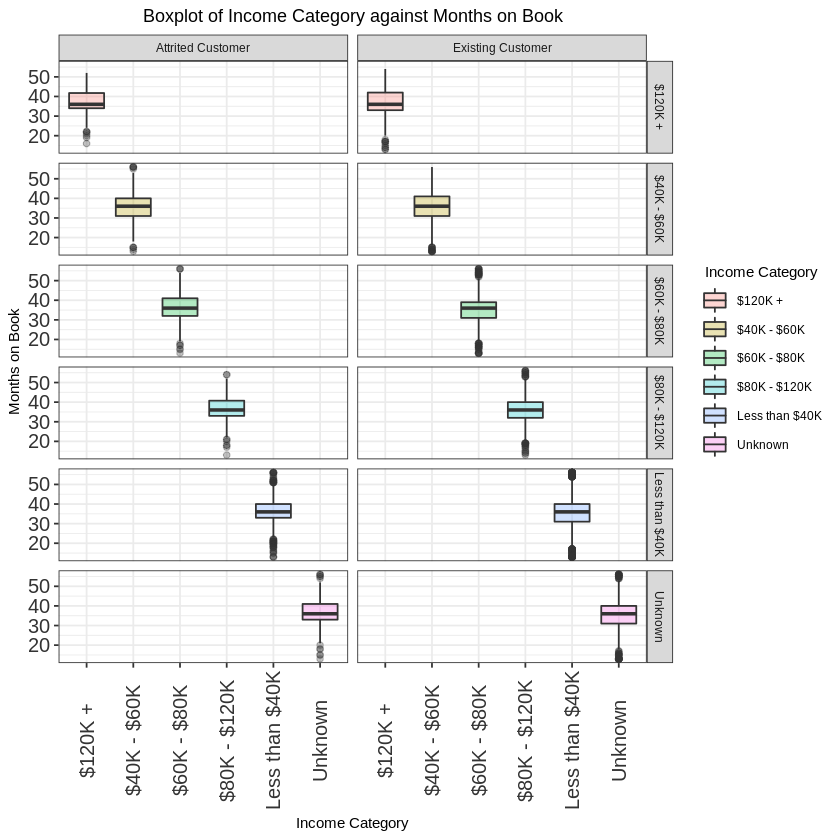

In [113]:
#Menampilkan boxplot relasi antara Income Category dengan Months on Book berdasarkan Income Category. 
ggplot(data = cld_x, aes(x = Income_Category, y = Months_on_book, fill = Income_Category)) +
  geom_boxplot(alpha = .3) +
  labs(x = "Income Category", 
       y = "Months on Book", 
       title = "Boxplot of Income Category against Months on Book") +
  scale_fill_discrete(name = "Income Category") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12, angle = 90,
                                   hjust = 0.5, vjust = 0.5),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 9)) +
  facet_grid(rows = vars(Income_Category), cols =  vars(Attrition_Flag))

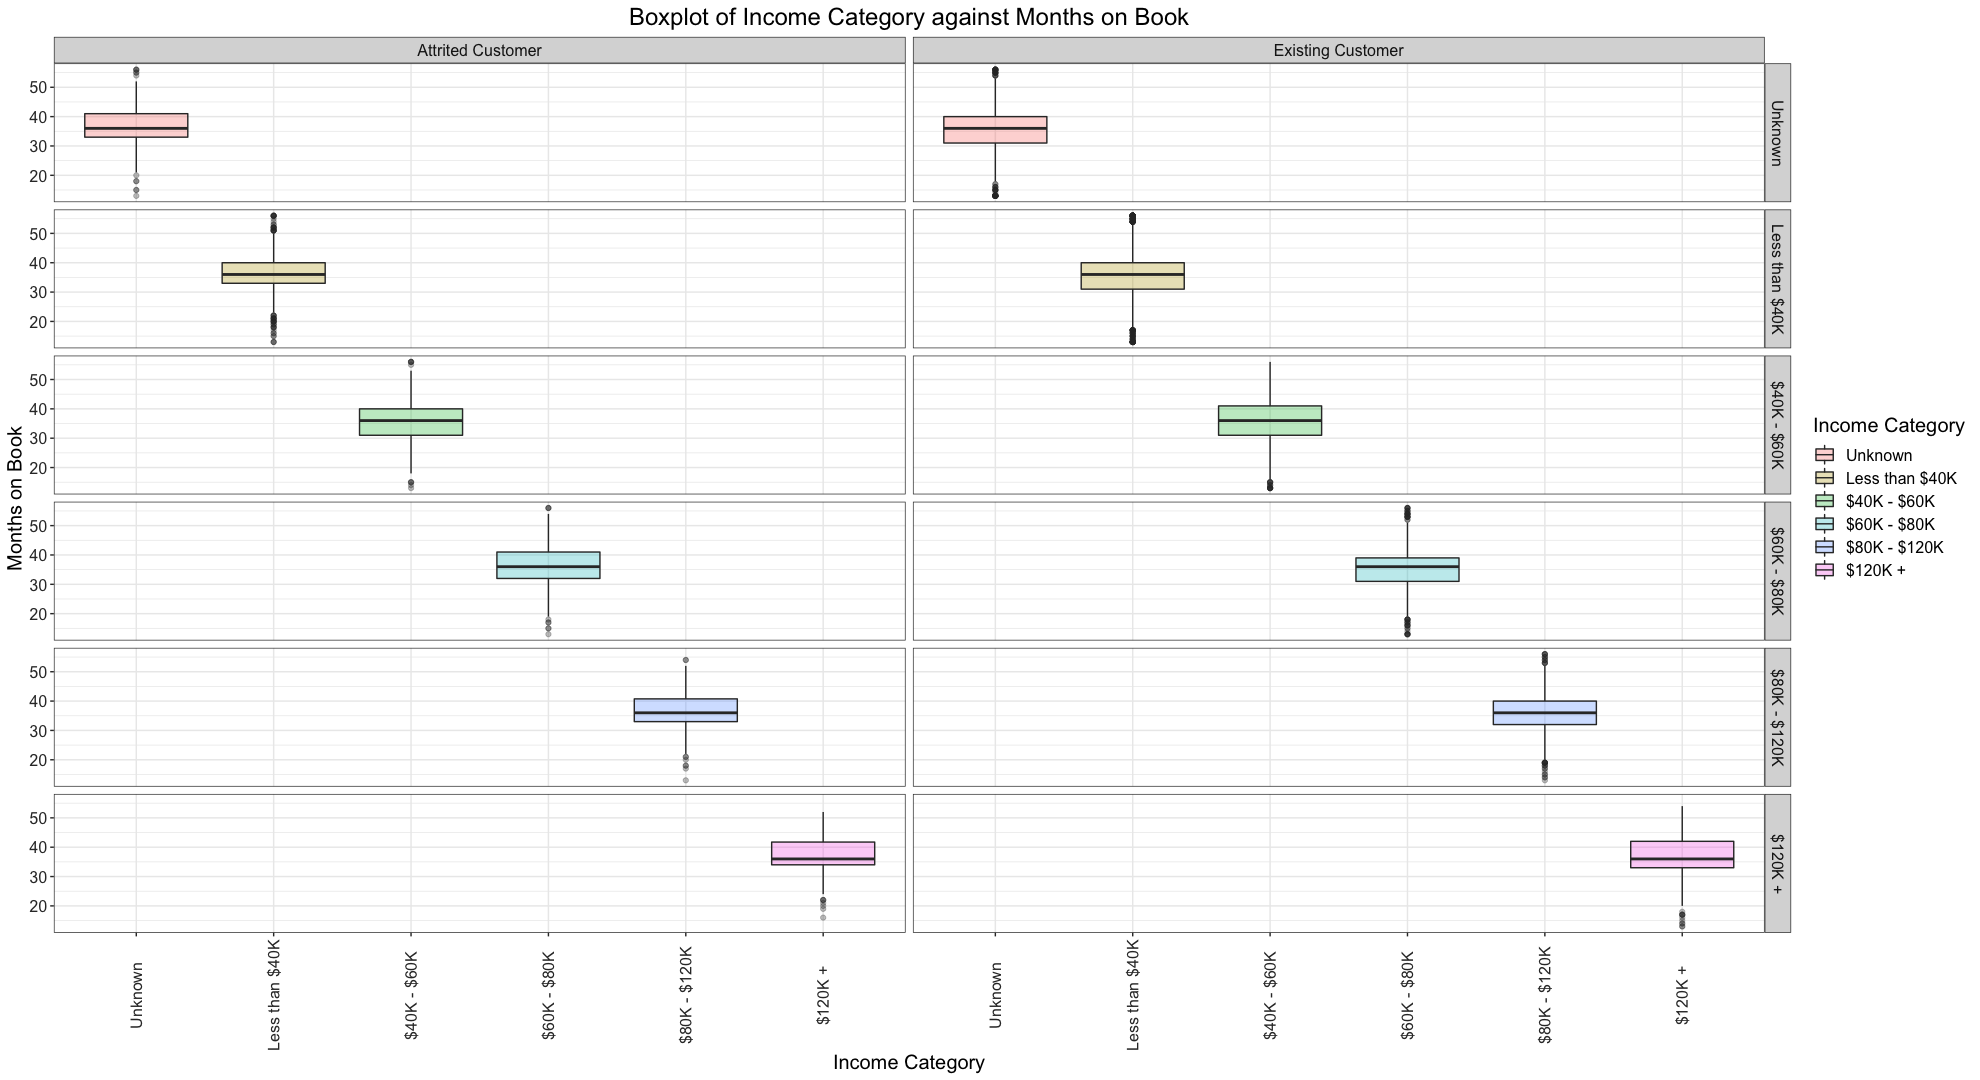

##**C. Scatterplot**

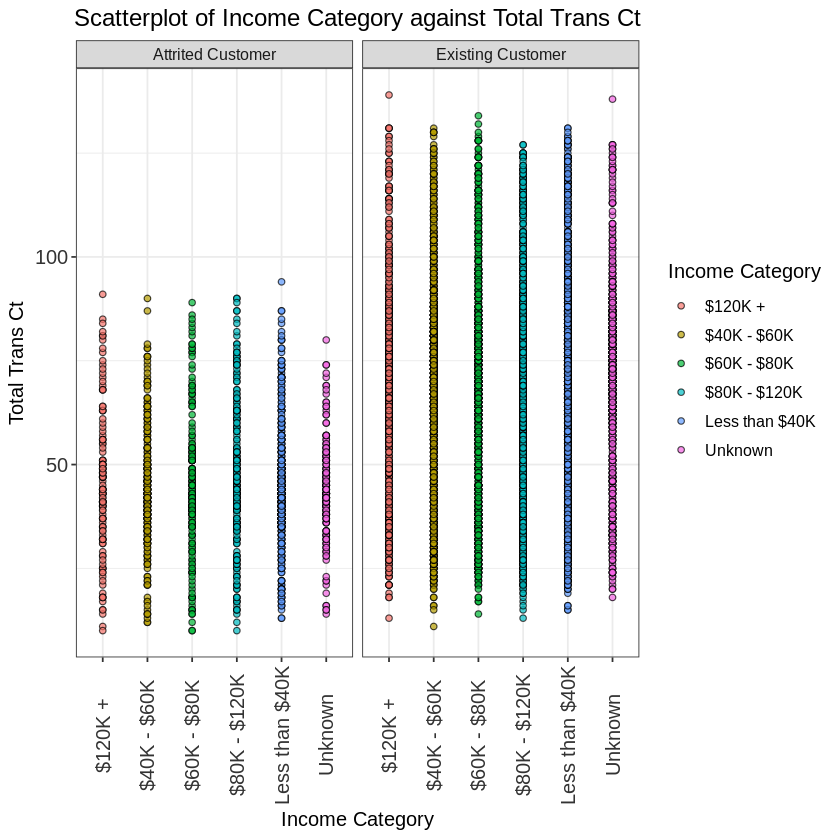

In [58]:
#Menampilkan scatterplot relasi antara Income Category dengan Total Trans Ct berdasarkan Income Category.
ggplot(data = cld_x, aes(x = Income_Category, y = Total_Trans_Ct, fill = Income_Category)) +
  geom_point(alpha = .7, pch = 21) +
  labs(x = "Income Category", 
       y = "Total Trans Ct",
       title = "Scatterplot of Income Category against Total Trans Ct") +
  scale_fill_discrete(name = "Income Category") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12, angle = 90,
                                   hjust = 0.5, vjust = 0.5),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 12)) + 
  facet_wrap(~Attrition_Flag, ncol = 2) 

  #find the correlation to support as argument

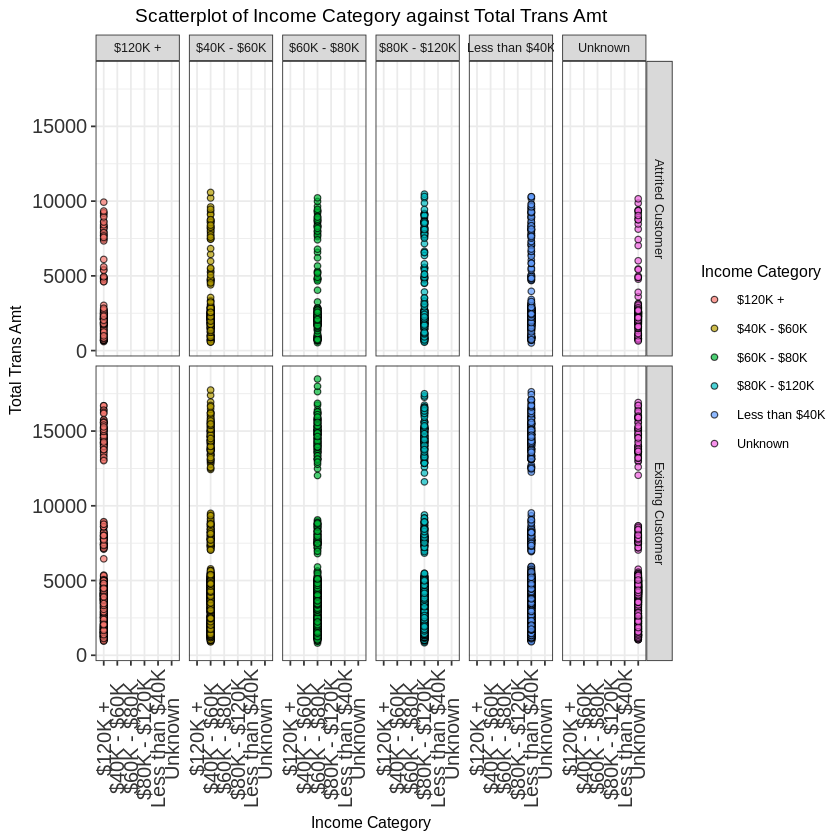

In [62]:
#Menampilkan scatterplot relasi antara Income Category dengan Total Trans Amt berdasarkan Income Category.
ggplot(data = cld_x, aes(x = Income_Category, y = Total_Trans_Amt, fill = Income_Category)) +
  geom_point(alpha = .7, pch = 21) +
  labs(x = "Income Category", 
       y = "Total Trans Amt",
       title = "Scatterplot of Income Category against Total Trans Amt") +
  scale_fill_discrete(name = "Income Category") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12, angle = 90,
                                   hjust = 0.5, vjust = 0.5),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 9.5)) + 
  facet_grid(rows = vars(Attrition_Flag), cols = vars(Income_Category))

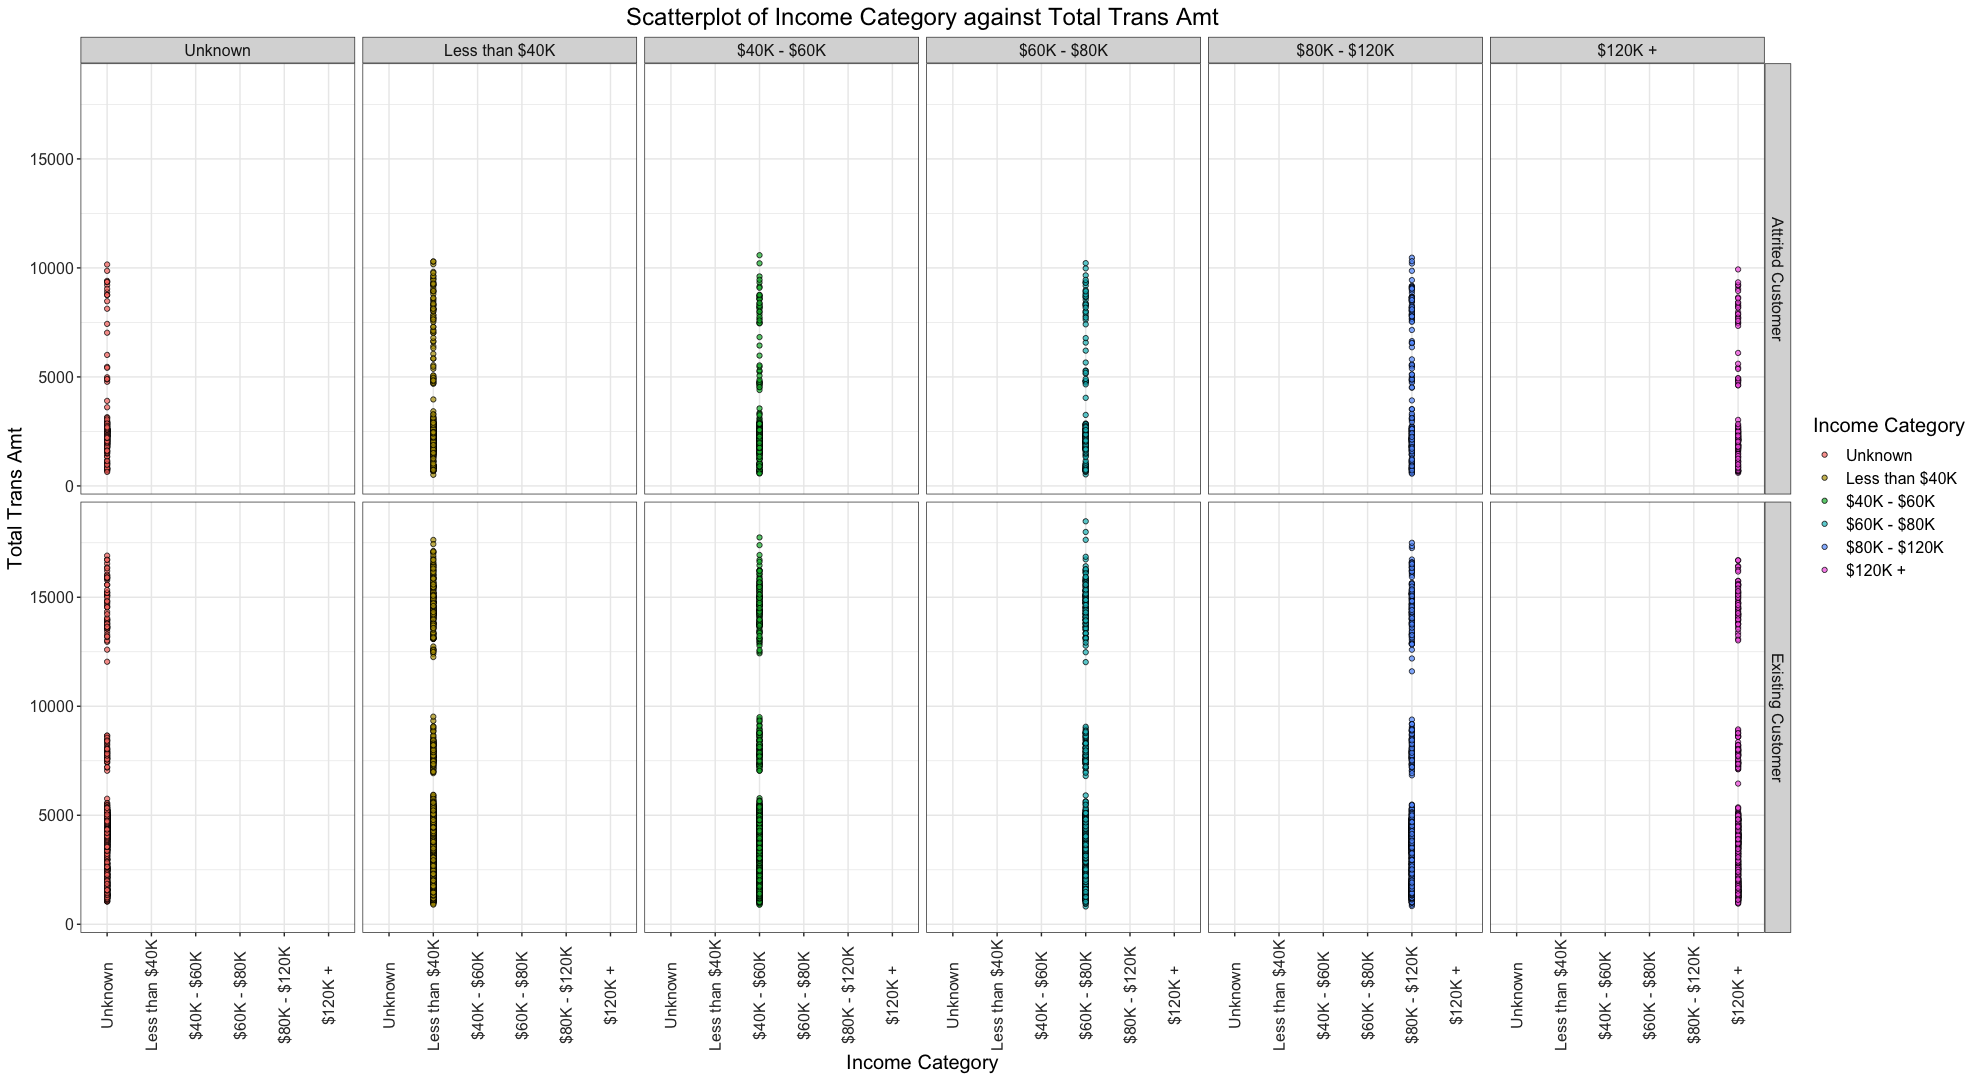

#**Months on Book**

##### Akan dilakukan visualisasi data berdasarkan atribut Months on Book terhadap atribut yang lainnya dengan berbagai macam tipe plot yang ada.

##**A.Boxplot**

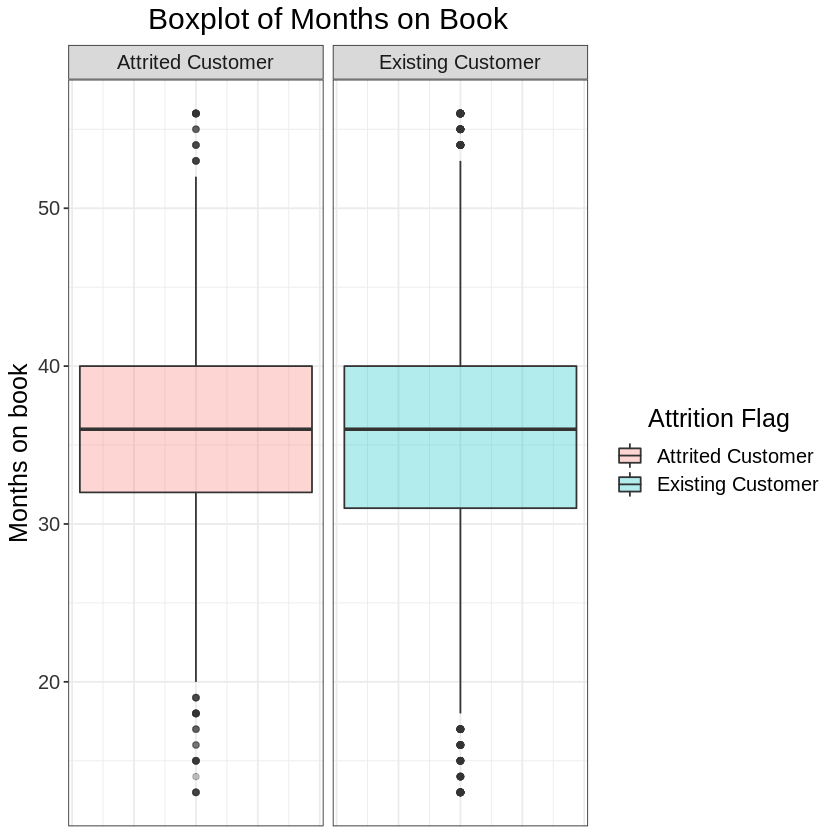

In [103]:
#Menampilkan boxplot Months on Book berdasarkan Attrition Flag.
ggplot(data = cld_x, aes(y = Months_on_book, fill = Attrition_Flag)) +
  geom_boxplot(alpha = .3) +
  labs(y = "Months on book", 
       title = "Boxplot of Months on Book") +
  scale_fill_discrete(name = "Attrition Flag") +
  theme_bw() +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        axis.text.y = element_text(colour = "grey20", size = 12),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 15)) +
  facet_grid(cols = vars(Attrition_Flag)) 

#**Months Inactive**

##### Akan dilakukan visualisasi data berdasarkan atribut Months Inactive terhadap atribut yang lainnya dengan berbagai macam tipe plot yang ada.

##**A. Boxplot**

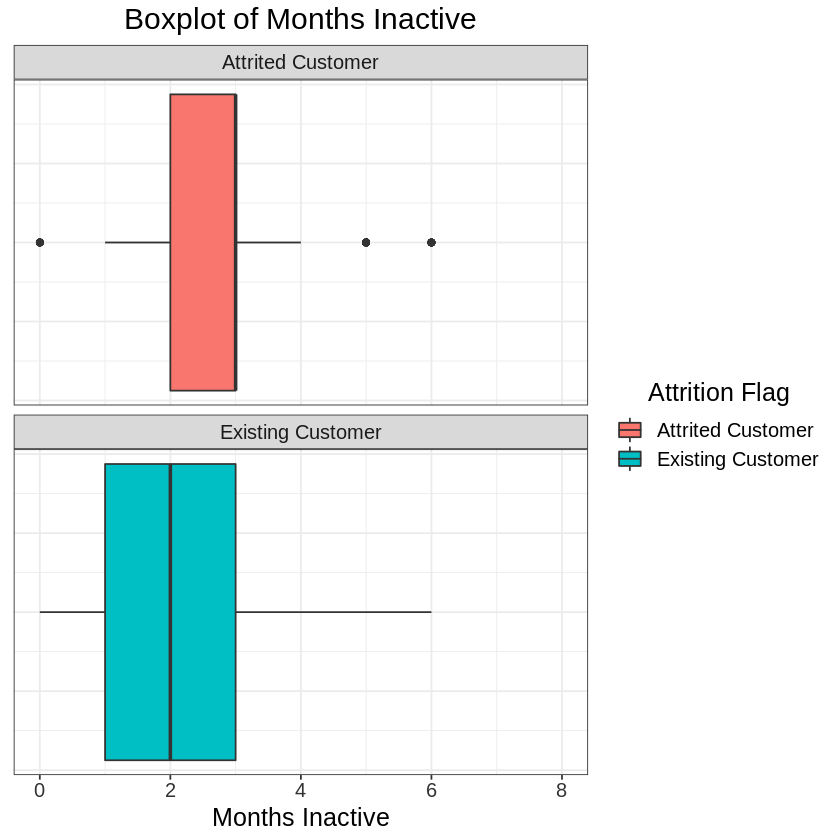

In [120]:
#Menampilkan boxplot Months Inactive 12 mon berdasarkan Attrition Flag.
ggplot(data = cld_x, aes(x = Months_Inactive_12_mon, fill =  Attrition_Flag)) +
  geom_boxplot(position = "dodge2") +
  labs(x = "Months Inactive", 
       title = "Boxplot of Months Inactive") +
  scale_fill_discrete(name = "Attrition Flag") +
  theme_bw() +
  theme(axis.text.x = element_text(colour = "grey20", size = 12),
        axis.text.y = element_blank(),
        plot.title = element_text(hjust = 0.5), 
        legend.title.align = 0.5,
        text = element_text(size = 15), 
        axis.ticks.y = element_blank()) +
  facet_wrap(~Attrition_Flag, nrow = 2) +
  coord_cartesian(xlim=c(0, 8)) 

#**Heatmap**
##### Akan dilakukan visualisasi data berdasarkan berbagai atribut terhadap atribut yang lainnya untuk menunjukkan korelasi antar variabel. 

In [ ]:
#Membuat variable baru berisikan data-data yang bertipe numerik untuk dibuat matriks korelasinya.
cld_numtype <- cld_x[c(1, 3, 5, 10:21)]
cld_numtype

In [ ]:
#Menampilkan matriks korelasi dari data-data yang bertipe numerik.
cld_cor_matrix <- cor(cld_numtype)
cld_cor_matrix

In [ ]:
#Menampilkan plot matriks korelasi dari data-data yang bertipe numerik.
corrplot(cld_cor_matrix, 
         method = "color",
         bg = "white",
         addCoef.col="black",
         number.cex= 7/ncol(cld_cor_matrix)
         )

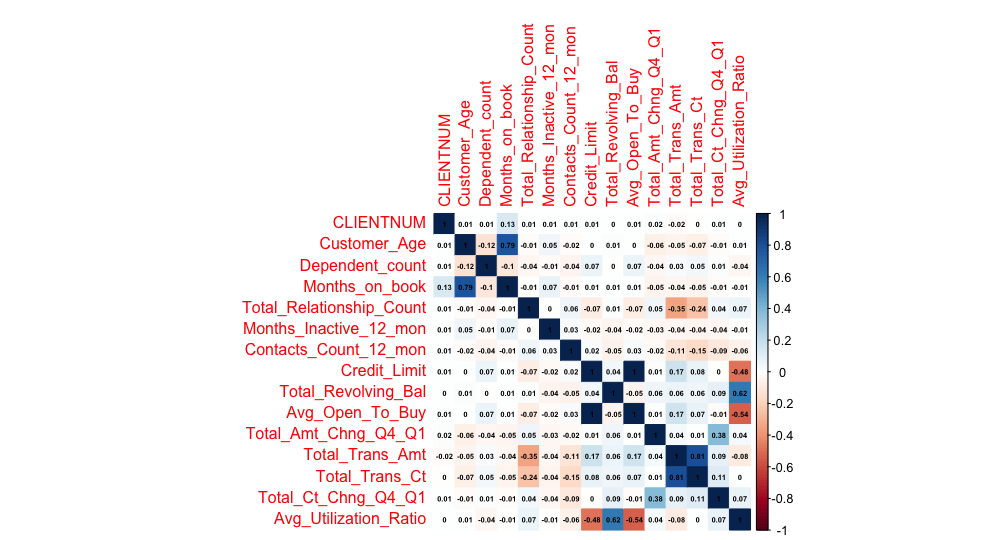

Berdasarkan heatmap di atas, dapat disimpulkan bahwa terdapat:


1. korelasi positif kuat antara:

>>
* variabel Customer_Age dengan variabel Months_on_book sebesar 0.79
* variabel Credit_Limit dengan variabel Avg_Open_To_Buy sebesar 1
* variabel Total_Revolving_Bal dengan variabel Avg_Utilization_Ratio sebesar 0.62
* variabel Total_Trans_Amt dengan variabel Total_Trans_Ct sebesar 0.81

2. korelasi positif lemah antara:

>>
* variabel Credit_Limit dengan variabel Total_Trans_Amt sebesar 0.17
* variabel Avg_Open_To_Buy dengan variabel Total_Trans_Amt sebesar 0.17
* variabel Total_Amt_Chng_Q4_Q1 dengan variabel Total_Ct_Chng_Q4_Q1 sebesar 0.38
* variabel Total_Trans_Ct dengan variabel Total_Ct_Chng_Q4_Q1 sebesar 0.11

3. korelasi negatif sedang antara:

>>
* variabel Avg_Open_To_Buy dengan variabel Avg_Utilization_Ratio sebesar -0.54

4. korelasi negatif lemah antara:

>>
* variabel Customer_Age dengan variabel Dependent_count sebesar -0.12
* variabel Months_on_book dengan variabel Dependent_count sebesar -0.1
* variabel Total_Relationship_Count dengan variabel Total_Trans_Amt sebesar -0.35
* variabel Total_Relationship_Count dengan variabel Total_Trans_Ct sebesar -0.24
* variabel Contacts_Count_12_mon dengan variabel Total_Trans_Amt sebesar -0.11
* variabel Contacts_Count_12_mon dengan variabel Total_Trans_Ct sebesar -0.15
* variabel Credit_Limit dengan variabel Avg_Utilization_Ratio sebesar -0.48


In [ ]:
#Menampilkan heatmap dari keseluruhan data, tanpa melihat masing-masing tipe dari data.
heatmap(cld_cor_matrix, 
        Rowv = NA, 
        Colv = NA, 
        main = "cleaned data heatmap")

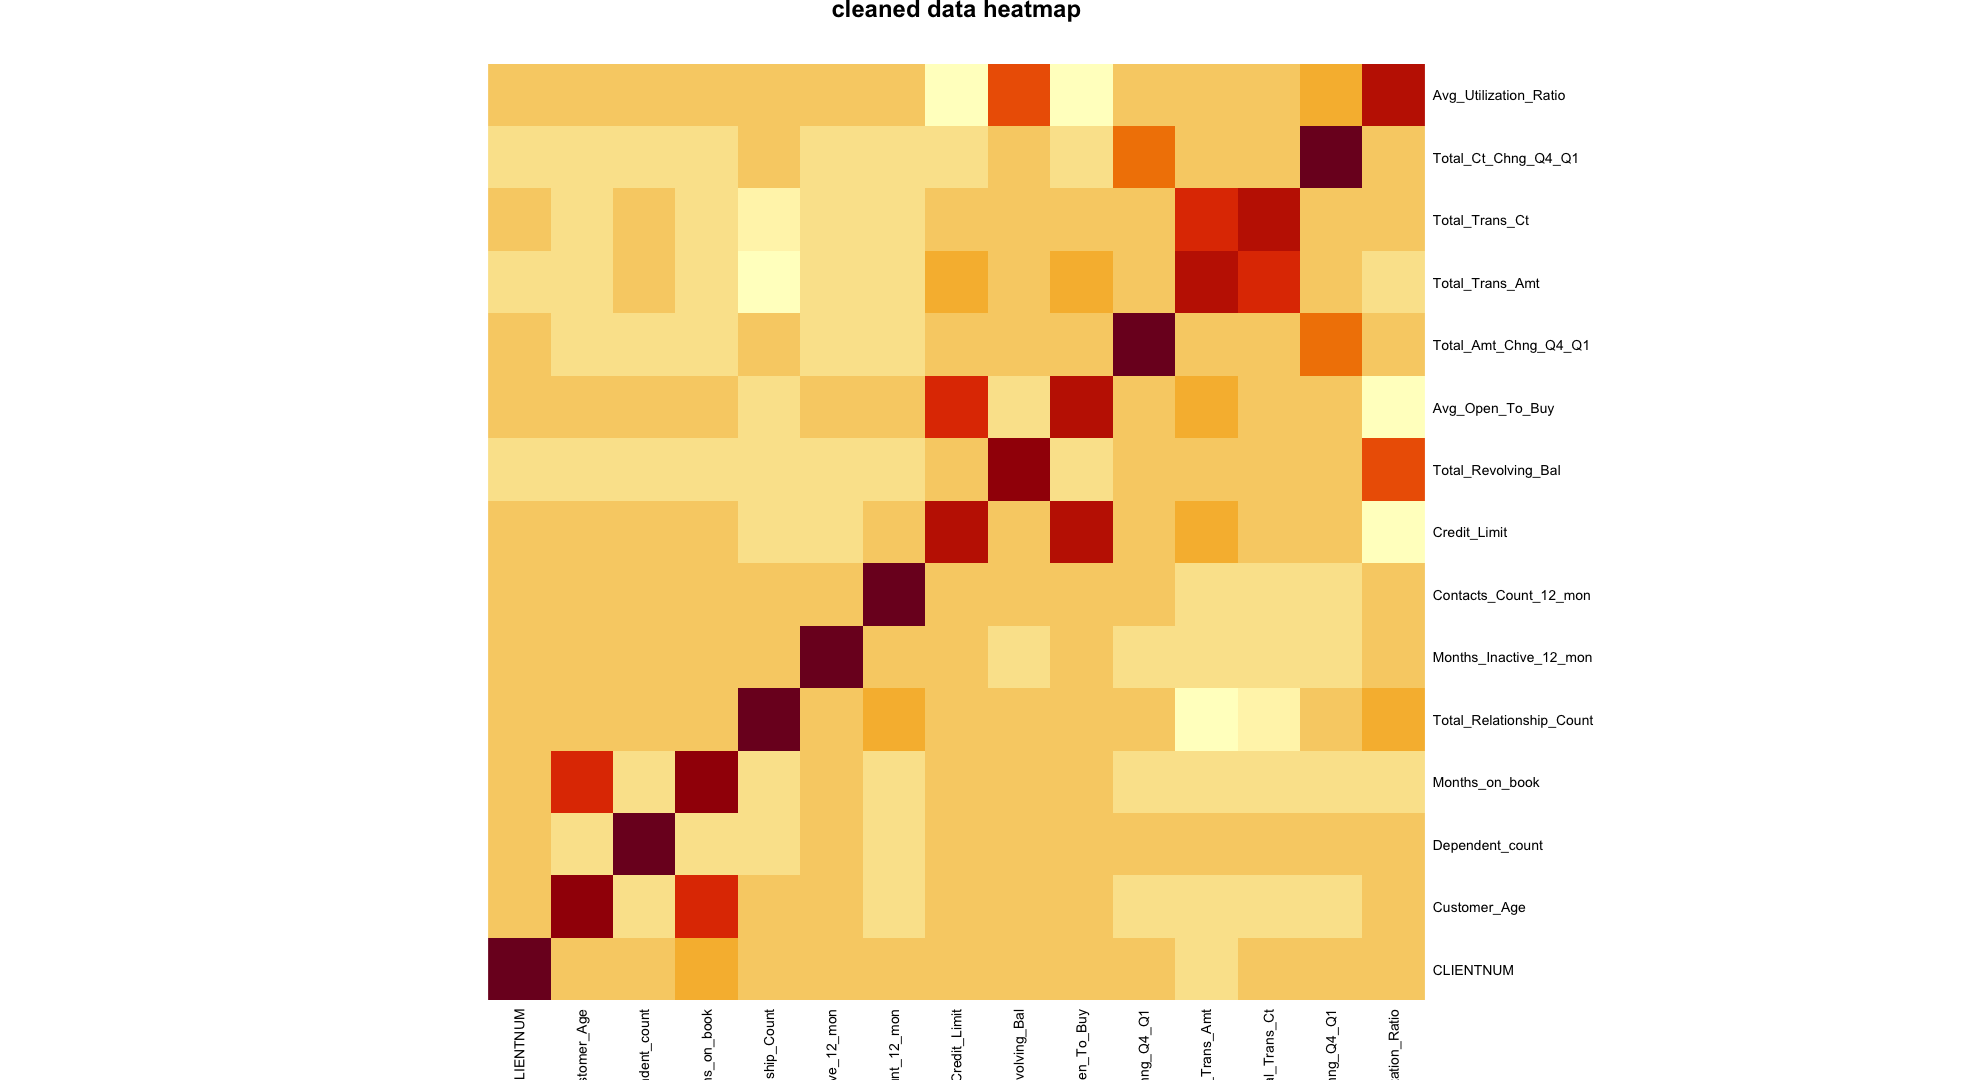